## Piotr Wycech

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import svm, preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from collinearity import SelectNonCollinear
from sklearn.metrics import plot_confusion_matrix, roc_curve, ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from scipy.stats import boxcox, yeojohnson
import random

# Introduction

Main goal of our analysis is to create a classification rule that will help us deciding whether message should be classified as spam or non-spam based on frequency of appearance for certain words, numbers, characters or consecutive capital letters in phrases. In order to do this, we will use following classification algorithms: linear discriminant analysis (LDA), quadratic discriminant analysis (QDA), logistic regression (LR), K-nearest neighbours algorithm (KNN) and support vector machine (SVM). We will try to optimize them by appropriately preparing or transforming data and optimize parameters of build-in python's functions in which following methods are already implemented. We will also try to ask ourselves, which metrics exactly we will try to maximize and what implications it will have on our classification. 

In order to be able to do it effectively however, we will firstly need to deeply analyze our starting data - without having prior information, proper usage of classifiers will be harder, if not even impossible to do. It will include gathering information about attributes, checking types of all variables, identifying missing values, analyzing important metrics for every feature (mean, standard variance, quantiles and so on), finding which variables contribute mostly to being classified as either spam or non-spam, and detect and analyze outliers.

# Data Analysis

## Data Set Information:
**Authors:** Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt<br>
**Abstract:** Classifying Email as Spam or Non-Spam<br>
**Source:** Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [ http://archive.ics.uci.edu/ml/datasets/Spambase ]. Irvine, CA: University of California, School of Information and Computer Science.

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...<br>
Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

## Attribute Information:
The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.



## Read data
Let's start by loading the data and check its structure and basic properties.

In [4]:
df = pd.read_csv("spambase.data", sep=",", header=None)
col_names = np.array(['word_freq_make',
             'word_freq_address',
             'word_freq_all',
             'word_freq_3d',
             'word_freq_our',
             'word_freq_over',
             'word_freq_remove',
             'word_freq_internet',
             'word_freq_order',
             'word_freq_mail',
             'word_freq_receive',
             'word_freq_will',
             'word_freq_people',
             'word_freq_report',
             'word_freq_addresses',
             'word_freq_free',
             'word_freq_business',
             'word_freq_email',
             'word_freq_you',
             'word_freq_credit',
             'word_freq_your',
             'word_freq_font',
             'word_freq_000',
             'word_freq_money',
             'word_freq_hp',
             'word_freq_hpl',
             'word_freq_george',
             'word_freq_650',
             'word_freq_lab',
             'word_freq_labs',
             'word_freq_telnet',
             'word_freq_857',
             'word_freq_data',
             'word_freq_415',
             'word_freq_85',
             'word_freq_technology',
             'word_freq_1999',
             'word_freq_parts',
             'word_freq_pm',
             'word_freq_direct',
             'word_freq_cs',
             'word_freq_meeting',
             'word_freq_original',
             'word_freq_project',
             'word_freq_re',
             'word_freq_edu',
             'word_freq_table',
             'word_freq_conference',
             'char_freq_;',
             'char_freq_(',
             'char_freq_[',
             'char_freq_!',
             'char_freq_$',
             'char_freq_#',
             'capital_run_length_average',
             'capital_run_length_longest',
             'capital_run_length_total',
                      'spam'])
#col_names = np.flip(col_names, 0)
df.columns = col_names
df

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00                0.00   
1              0.14            0.28              0.21                0.07   
2              1.23            0.19              0.19                0.12   
3              0.63            0.00              0.31                0.63   
4              0.63            0.00              0.31                0.63   
...             ...             ...               ...                 ...   
4596           0.00            0.31              0.00                0.00   
4597           0.00            0.00              0.00                0.00   
4598           0.00            0.00              0.00                0.00   
4599           0.32            0.00              0.00                0.00   
4600           0.00            0.00              0.00                0.00   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0                0.00            0.00  ...        0.000        0.000   
1                0.00            0.94  ...        0.000        0.132   
2                0.64            0.25  ...        0.010        0.143   
3                0.31            0.63  ...        0.000        0.137   
4                0.31            0.63  ...        0.000        0.135   
...               ...             ...  ...          ...          ...   
4596             0.00            0.00  ...        0.000        0.232   
4597             0.00            0.00  ...        0.000        0.000   
4598             0.00            0.00  ...        0.102        0.718   
4599             0.00            0.00  ...        0.000        0.057   
4600             0.00            0.00  ...        0.000        0.000   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0             0.0        0.778        0.000        0.000   
1             0.0        0.372        0.180        0.048   
2             0.0        0.276        0.184        0.010   
3             0.0        0.137        0.000        0.000   
4             0.0        0.135        0.000        0.000   
...           ...          ...          ...          ...   
4596          0.0        0.000        0.000        0.000   
4597          0.0        0.353        0.000        0.000   
4598          0.0        0.000        0.000        0.000   
4599          0.0        0.000        0.000        0.000   
4600          0.0        0.125        0.000        0.000   

      capital_run_length_average  capital_run_length_longest  \
0                          3.756                          61   
1                          5.114                         101   
2                          9.821                         485   
3                          3.537                          40   
4                          3.537                          40   
...                          ...                         ...   
4596                       1.142                           3   
4597                       1.555                           4   
4598                       1.404                      

From the table above we can already point some qualities:

* number of instances = 4601

* number of features = 58

* number of classes = 2

## Checking all variable types
Next we check the types of features in our dataset. As we can see below we changed the type of the column "spam" to a boolean, because it indicates if an email is a spam or not. All the remaining features are numbers.<br>
Additionally we counted unique values in each column and presented the results in the table below.

In [4]:
df2 = df.astype({'spam': 'bool'})
#df2.dtypes

In [5]:
var_type_uniqe = pd.concat([df2.dtypes, df2.nunique()], axis=1)
var_type_uniqe.columns = ["Data type", "Unique values"]
#var_type_uniqe.index.name = "Column"
var_type_uniqe

Data type  Unique values
word_freq_make               float64            142
word_freq_address            float64            171
word_freq_all                float64            214
word_freq_3d                 float64             43
word_freq_our                float64            255
word_freq_over               float64            141
word_freq_remove             float64            173
word_freq_internet           float64            170
word_freq_order              float64            144
word_freq_mail               float64            245
word_freq_receive            float64            113
word_freq_will               float64            316
word_freq_people             float64            158
word_freq_report             float64            133
word_freq_addresses          float64            118
word_freq_free               float64            253
word_freq_business           float64            197
word_freq_email              float64            229
word_freq_you                float64            575
word_freq_credit             float64            148
word_freq_your               float64            401
word_freq_font               float64             99
word_freq_000                float64            164
word_freq_money              float64            143
word_freq_hp                 float64            395
word_freq_hpl                float64            281
word_freq_george             float64            240
word_freq_650                float64            200
word_freq_lab                float64            156
word_freq_labs               float64            179
word_freq_telnet             float64            128
word_freq_857                float64            106
word_freq_data               float64            184
word_freq_415                float64            110
word_freq_85                 float64            177
word_freq_technology         float64            159
word_freq_1999               float64            188
word_freq_parts              float64             53
word_freq_pm                 float64            163
word_freq_direct             float64            125
word_freq_cs                 float64            108
word_freq_meeting            float64            186
word_freq_original           float64            136
word_freq_project            float64            160
word_freq_re                 float64            230
word_freq_edu                float64            227
word_freq_table              float64             38
word_freq_conference         float64            106
char_freq_;                  float64            313
char_freq_(                  float64            641
char_freq_[                  float64            225
char_freq_!                  float64            964
char_freq_$                  float64            504
char_freq_#                  float64            316
capital_run_length_average   float64           2161
capital_run_length_longest     int64            271
capital_run_length_total       int64            919
spam                            bool              2

## Identification of missing values
Very important question that we need to answer is: "Are there any missing values in our data?".<br>
As we see below, fortunately there are no missing values in any column.

In [6]:
df2.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Now we have some basic knowledge about our data, so we can move on to some more specific analysis. We are going to analyse possible dependencies (correlation) of features. Then we will calculate the basic characteristics of variables using summary statistics. Based on these informations we are going to check, if we can separate objects from different classes using some of the features.

## Correlation heatmap
In order to check all possible dependencies in our data, we create a correlation heatmap, which contains correlations between all features. Below we can see that most of them are not correlated, but there are some areas, where the correlation appears in some extent.

<AxesSubplot:>

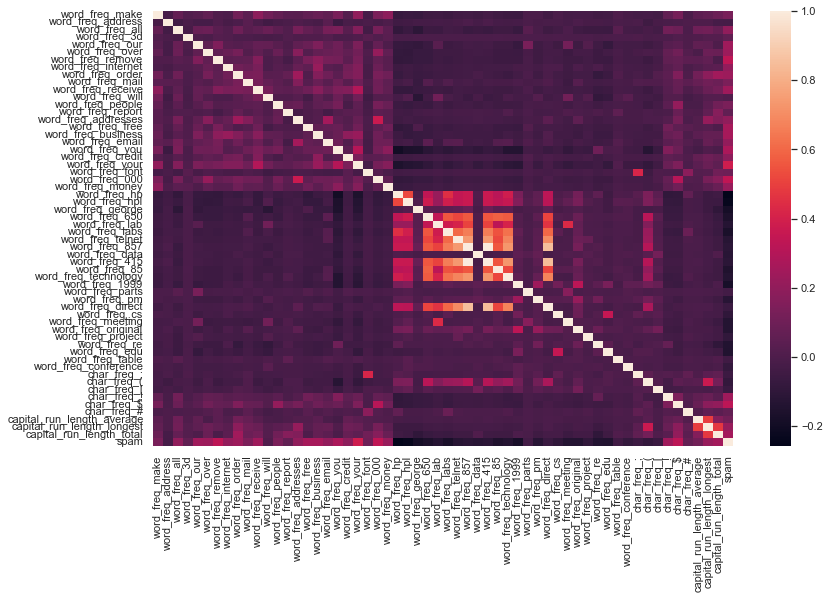

In [7]:
# calculate the correlation matrix
corr = df2.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Now, to see which features are correlated, we extract these areas.<br>
In the first area we can see the features with the highest correlations.

<AxesSubplot:>

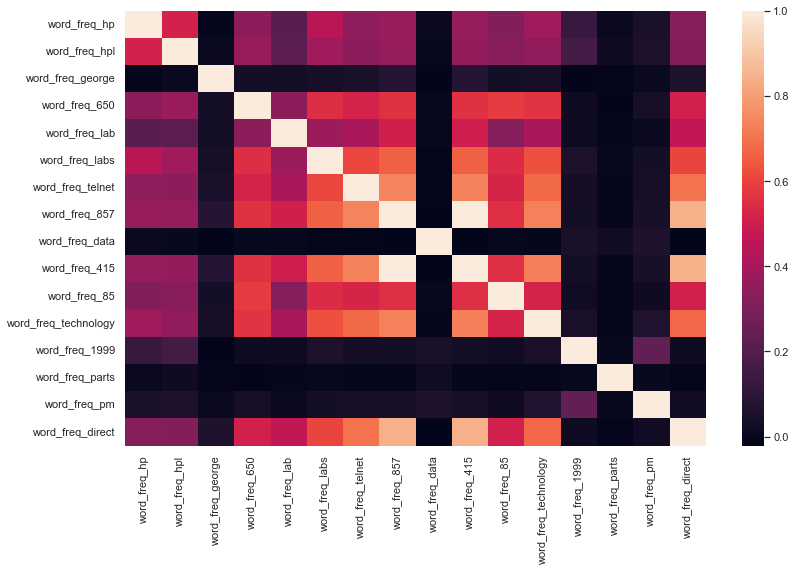

In [8]:
# calculate the correlation matrix
corr = df2.iloc[:,range(24,40)].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In the second area it seems that there is some dependence beetwen the length of longest uninterrupted sequence of capital letters and total number of capital letters in the e-mail, which we could expect.

<AxesSubplot:>

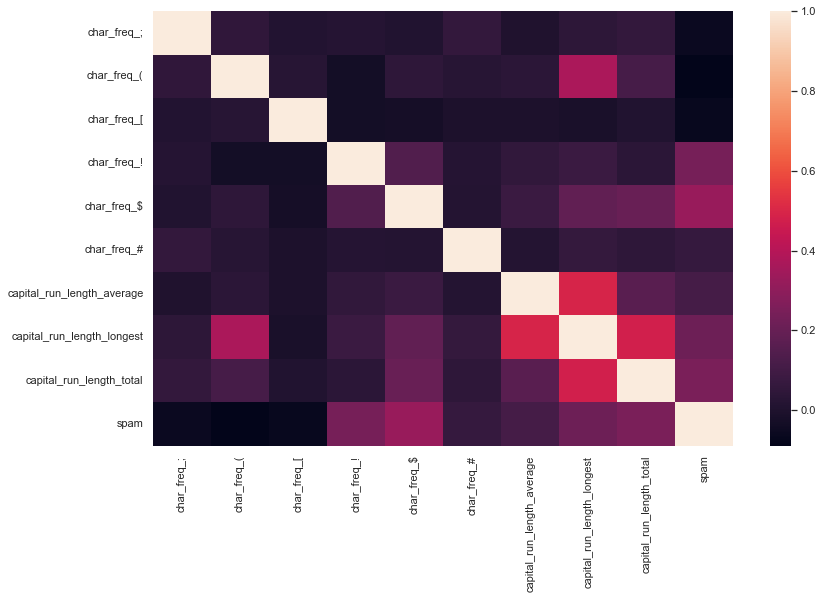

In [9]:
# calculate the correlation matrix
corr = df2.iloc[:,range(48,58)].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Basic characteristics
The next step is to calculate the basic statistics. In the table below we can find the informations about the range and properties of distribution.

In [10]:
df2.loc[:, df2.columns!='spam'].describe(include='all')

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.380000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  ...  word_freq_conference  \
count      4601.000000     4601.000000  ...           4601.000000   
mean          0.090067        0.239413  ...              0.031869   
std           0.278616        0.644755  ...              0.285735   
min           0.000000        0.000000  ...              0.000000   
25%           0.000000        0.000000  ...              0.000000   
50%           0.000000        0.000000  ...              0.000000   
75%           0.000000        0.160000  ...              0.000000   
max           5.260000       18.180000  ...             10.000000   

       char_freq_;  char_freq_(  char_freq_[  char_freq_!  char_freq_$  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.038575     0.139030     0.016976     0.269071     0.075811   
std       0.243471     0.270355     0.109394     0.815672     0.245882   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.065000     0.000000     0.000000     0.000000   
75%       0.000000     0.188000     0.000000     0.315000     0.052000   
max       4.385000     9.752000     4.081000    32.478000     6.003000   

       char_freq_#  capital_run_length_average  capital_run_length_longest  \
count  4601.000000                 4601.000000                 4601.000000   
mean      0.044238                    5.191515                   52.172789   
std       0.429342                   31.729449                  194.891310   
min       0.000000                    1.000000                    1.000000   
25%       0.000000                    1.588000                    6.000000   
50%       0.000000                    2.276000                   15.000000   
75%       0.000000                    3.706000                   43.000000   
max      19.829000                 1102.500000                 9989.000000   

       capital_run_length_total  
count               4601.000000  
mean                 283.289285  
std                  606.347851  
min                    1.000000  
25%                   35.000000  
50%                   95.000000  
75%                  266.000000  
max                15841.000000  

[8 rows x 57 columns]

# Spam and non-spam
Each email can be either spam or non-spam. It is worth to also calculate basic statistics from each of those two classes. Additionaly we would like to check if there are some features that might have high impact on the classification of an email.

In [11]:
spam = df2.where(df2["spam"]==True).loc[:, df2.columns!='spam']
non_spam = df2.where(df2["spam"]==False).loc[:, df2.columns!='spam']

Lets start with the basic characteristics for each class. Unfortunately, it is very hard to notice something useful in tables below. However we can see that there are 1813 emails considered as spam and 2788 non-spam emails. Additionaly there are some visible differences in some columns, e.g. high max values in one of the classes and low in the other class. 

In [12]:
spam.describe(include='all')

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     1813.000000        1813.000000    1813.000000   1813.000000   
mean         0.152339           0.164650       0.403795      0.164672   
std          0.310645           0.348919       0.480725      2.219087   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.300000      0.000000   
75%          0.170000           0.210000       0.640000      0.000000   
max          4.540000           4.760000       3.700000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    1813.000000     1813.000000       1813.000000         1813.000000   
mean        0.513955        0.174876          0.275405            0.208141   
std         0.707195        0.321927          0.572110            0.544864   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.290000        0.000000          0.000000            0.000000   
75%         0.780000        0.240000          0.340000            0.190000   
max         7.690000        2.540000          7.270000           11.110000   

       word_freq_order  word_freq_mail  ...  word_freq_conference  \
count      1813.000000     1813.000000  ...           1813.000000   
mean          0.170061        0.350507  ...              0.002101   
std           0.354804        0.631384  ...              0.026821   
min           0.000000        0.000000  ...              0.000000   
25%           0.000000        0.000000  ...              0.000000   
50%           0.000000        0.000000  ...              0.000000   
75%           0.190000        0.510000  ...              0.000000   
max           3.330000        7.550000  ...              0.770000   

       char_freq_;  char_freq_(  char_freq_[  char_freq_!  char_freq_$  \
count  1813.000000  1813.000000  1813.000000  1813.000000  1813.000000   
mean      0.020573     0.108970     0.008199     0.513713     0.174478   
std       0.091621     0.282141     0.047449     0.744183     0.360479   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.094000     0.000000   
50%       0.000000     0.065000     0.000000     0.331000     0.080000   
75%       0.000000     0.144000     0.000000     0.645000     0.211000   
max       1.117000     9.752000     1.171000     7.843000     6.003000   

       char_freq_#  capital_run_length_average  capital_run_length_longest  \
count  1813.000000                 1813.000000                 1813.000000   
mean      0.078877                    9.519165                  104.393271   
std       0.611941                   49.846186                  299.284969   
min       0.000000                    1.000000                    1.000000   
25%       0.000000                    2.324000                   15.000000   
50%       0.000000                    3.621000                   38.000000   
75%       0.018000                    5.708000                   84.000000   
max      19.829000                 1102.500000                 9989.000000   

       capital_run_length_total  
count               1813.000000  
mean                 470.619415  
std                  825.081179  
min                    2.000000  
25%                   93.000000  
50%                  194.000000  
75%                  530.000000  
max                15841.000000  

[8 rows x 57 columns]

In [13]:
non_spam.describe(include='all')

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     2788.000000        2788.000000    2788.000000   2788.000000   
mean         0.073479           0.244466       0.200581      0.000886   
std          0.297838           1.633223       0.502959      0.021334   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.120000      0.000000   
max          4.340000          14.280000       5.100000      0.870000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    2788.000000     2788.000000       2788.000000         2788.000000   
mean        0.181040        0.044544          0.009383            0.038415   
std         0.614521        0.222888          0.110467            0.247238   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.000000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          3.070000            5.880000   

       word_freq_order  word_freq_mail  ...  word_freq_conference  \
count      2788.000000     2788.000000  ...           2788.000000   
mean          0.038049        0.167170  ...              0.051227   
std           0.198517        0.643197  ...              0.365153   
min           0.000000        0.000000  ...              0.000000   
25%           0.000000        0.000000  ...              0.000000   
50%           0.000000        0.000000  ...              0.000000   
75%           0.000000        0.000000  ...              0.000000   
max           5.260000       18.180000  ...             10.000000   

       char_freq_;  char_freq_(  char_freq_[  char_freq_!  char_freq_$  \
count  2788.000000  2788.000000  2788.000000  2788.000000  2788.000000   
mean      0.050281     0.158578     0.022684     0.109984     0.011648   
std       0.303372     0.260604     0.134927     0.820859     0.069647   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.064500     0.000000     0.000000     0.000000   
75%       0.000000     0.222000     0.000000     0.027000     0.000000   
max       4.385000     5.277000     4.081000    32.478000     2.038000   

       char_freq_#  capital_run_length_average  capital_run_length_longest  \
count  2788.000000                 2788.000000                 2788.000000   
mean      0.021713                    2.377301                   18.214491   
std       0.243912                    5.113685                   39.084792   
min       0.000000                    1.000000                    1.000000   
25%       0.000000                    1.384000                    4.000000   
50%       0.000000                    1.857000                   10.000000   
75%       0.000000                    2.555000                   18.000000   
max       7.407000                  251.000000                 1488.000000   

       capital_run_length_total  
count               2788.000000  
mean                 161.470947  
std                  355.738403  
min                    1.000000  
25%                   18.750000  
50%                   54.000000  
75%                  141.000000  
max                 5902.000000  

[8 rows x 57 columns]

In order to find some features, that may have inpact on the classification of an email, we take a look at the sums of the values in each column and at their mean values. Then we calculte the ratio between spam and non-spam emails. The results (sums of values) are shown in table below.

In [14]:
spam_diff_sum = pd.concat([spam.sum(), non_spam.sum(), spam.sum()/non_spam.sum()], axis=1)
spam_diff_sum.columns = ["Spam", "Non-spam", "Ratio"]
#var_type_uniqe.index.name = "Column"
spam_diff_sum

Spam    Non-spam       Ratio
word_freq_make                 276.190     204.860    1.348189
word_freq_address              298.510     681.570    0.437974
word_freq_all                  732.080     559.220    1.309109
word_freq_3d                   298.550       2.470  120.870445
word_freq_our                  931.800     504.740    1.846099
word_freq_over                 317.050     124.190    2.552943
word_freq_remove               499.310      26.160   19.086774
word_freq_internet             377.360     107.100    3.523436
word_freq_order                308.320     106.080    2.906486
word_freq_mail                 635.470     466.070    1.363465
word_freq_receive              214.720      60.530    3.547332
word_freq_will                 997.100    1495.270    0.666836
word_freq_people               260.250     171.920    1.513785
word_freq_report               151.520     118.220    1.281678
word_freq_addresses            203.200      23.190    8.762398
word_freq_free                 939.790     205.160    4.580766
word_freq_business             521.250     134.790    3.867127
word_freq_email                578.760     271.250    2.133677
word_freq_you                 4105.610    3541.710    1.159217
word_freq_credit               372.610      21.130   17.634169
word_freq_your                2502.610    1223.100    2.046121
word_freq_font                 431.560     126.090    3.422635
word_freq_000                  447.910      19.760   22.667510
word_freq_money                385.950      47.780    8.077648
word_freq_hp                    31.690    2496.580    0.012693
word_freq_hpl                   16.630    1204.400    0.013808
word_freq_george                 2.810    3527.560    0.000797
word_freq_650                   34.080     540.330    0.063073
word_freq_lab                    1.240     453.870    0.002732
word_freq_labs                  10.820     462.400    0.023400
word_freq_telnet                 2.310     295.620    0.007814
word_freq_857                    0.940     215.530    0.004361
word_freq_data                  26.400     420.950    0.062715
word_freq_415                    3.220     216.870    0.014848
word_freq_85                    12.560     472.440    0.026585
word_freq_technology            53.510     394.980    0.135475
word_freq_1999                  78.810     551.310    0.142950
word_freq_parts                  8.540      52.200    0.163602
word_freq_pm                    22.530     339.240    0.066413
word_freq_direct                66.570     231.730    0.287274
word_freq_cs                     0.100     200.810    0.000498
word_freq_meeting                4.430     604.460    0.007329
word_freq_original              15.320     196.780    0.077853
word_freq_project               11.320     353.060    0.032063
word_freq_re                   226.790    1159.140    0.195654
word_freq_edu                   26.700     800.670    0.033347
word_freq_table                  2.210      22.840    0.096760
word_freq_conference             3.810     142.820    0.026677
char_freq_;                     37.299     140.183    0.266074
char_freq_(                    197.563     442.116    0.446858
char_freq_[                     14.864      63.242    0.235034
char_freq_!                    931.361     306.634    3.037370
char_freq_$                    316.329      32.476    9.740393
char_freq_#                    143.004      60.536    2.362297
capital_run_length_average   17258.246    6627.915    2.603873
capital_run_length_longest  189265.000   50782.000    3.727010
capital_run_length_total    853233.000  450181.000    1.895311

Here are the features with the largest ratios of sums.

In [15]:
spam_diff_sum[spam_diff_sum.Ratio > 8]

Spam  Non-spam       Ratio
word_freq_3d         298.550     2.470  120.870445
word_freq_remove     499.310    26.160   19.086774
word_freq_addresses  203.200    23.190    8.762398
word_freq_credit     372.610    21.130   17.634169
word_freq_000        447.910    19.760   22.667510
word_freq_money      385.950    47.780    8.077648
char_freq_$          316.329    32.476    9.740393

Now insteed of sums, we consider mean values of each column.

In [16]:
spam_diff_mean = pd.concat([spam.mean(), non_spam.mean(), spam.mean()/non_spam.mean()], axis=1)
spam_diff_mean.columns = ["Spam", "Non-spam", "Ratio"]
#var_type_uniqe.index.name = "Column"
spam_diff_mean

Spam    Non-spam       Ratio
word_freq_make                0.152339    0.073479    2.073222
word_freq_address             0.164650    0.244466    0.673509
word_freq_all                 0.403795    0.200581    2.013125
word_freq_3d                  0.164672    0.000886  185.872477
word_freq_our                 0.513955    0.181040    2.838899
word_freq_over                0.174876    0.044544    3.925872
word_freq_remove              0.275405    0.009383   29.351310
word_freq_internet            0.208141    0.038415    5.418279
word_freq_order               0.170061    0.038049    4.469543
word_freq_mail                0.350507    0.167170    2.096712
word_freq_receive             0.118434    0.021711    5.455026
word_freq_will                0.549972    0.536324    1.025449
word_freq_people              0.143547    0.061664    2.327873
word_freq_report              0.083574    0.042403    1.970943
word_freq_addresses           0.112079    0.008318   13.474663
word_freq_free                0.518362    0.073587    7.044223
word_freq_business            0.287507    0.048346    5.946800
word_freq_email               0.319228    0.097292    3.281132
word_freq_you                 2.264539    1.270341    1.782624
word_freq_credit              0.205521    0.007579   27.117520
word_freq_your                1.380370    0.438702    3.146489
word_freq_font                0.238036    0.045226    5.263268
word_freq_000                 0.247055    0.007088   34.857704
word_freq_money               0.212879    0.017138   12.421667
word_freq_hp                  0.017479    0.895473    0.019520
word_freq_hpl                 0.009173    0.431994    0.021233
word_freq_george              0.001550    1.265265    0.001225
word_freq_650                 0.018798    0.193806    0.096992
word_freq_lab                 0.000684    0.162794    0.004201
word_freq_labs                0.005968    0.165854    0.035984
word_freq_telnet              0.001274    0.106033    0.012016
word_freq_857                 0.000518    0.077306    0.006707
word_freq_data                0.014562    0.150986    0.096442
word_freq_415                 0.001776    0.077787    0.022832
word_freq_85                  0.006928    0.169455    0.040883
word_freq_technology          0.029515    0.141671    0.208331
word_freq_1999                0.043469    0.197744    0.219827
word_freq_parts               0.004710    0.018723    0.251584
word_freq_pm                  0.012427    0.121679    0.102129
word_freq_direct              0.036718    0.083117    0.441765
word_freq_cs                  0.000055    0.072027    0.000766
word_freq_meeting             0.002443    0.216808    0.011270
word_freq_original            0.008450    0.070581    0.119722
word_freq_project             0.006244    0.126636    0.049305
word_freq_re                  0.125091    0.415760    0.300873
word_freq_edu                 0.014727    0.287184    0.051281
word_freq_table               0.001219    0.008192    0.148796
word_freq_conference          0.002101    0.051227    0.041023
char_freq_;                   0.020573    0.050281    0.409163
char_freq_(                   0.108970    0.158578    0.687170
char_freq_[                   0.008199    0.022684    0.361431
char_freq_!                   0.513713    0.109984    4.670815
char_freq_$                   0.174478    0.011648   14.978608
char_freq_#                   0.078877    0.021713    3.632699
capital_run_length_average    9.519165    2.377301    4.004190
capital_run_length_longest  104.393271   18.214491    5.731331
capital_run_length_total    470.619415  161.470947    2.914576

Here are the features with the largest ratios of arithmetic means.

In [17]:
spam_diff_mean[spam_diff_mean.Ratio > 8]

Spam  Non-spam       Ratio
word_freq_3d         0.164672  0.000886  185.872477
word_freq_remove     0.275405  0.009383   29.351310
word_freq_addresses  0.112079  0.008318   13.474663
word_freq_credit     0.205521  0.007579   27.117520
word_freq_000        0.247055  0.007088   34.857704
word_freq_money      0.212879  0.017138   12.421667
char_freq_$          0.174478  0.011648   14.978608

We can see that in both cases, there are the same columns that have much higher ratio than the others. It may indicate, that these features are crutial to consider an email as the spam.<br>
Let's see how this look in case of non-spam emails. The tables below are the same, but now the ratio is between non-spam and spam emails (inverse of the previous case).

In [18]:
non_spam_diff_sum = pd.concat([spam.sum(), non_spam.sum(), non_spam.sum()/spam.sum()], axis=1)
non_spam_diff_sum.columns = ["Spam", "Non-spam", "Ratio"]
non_spam_diff_sum

Spam    Non-spam        Ratio
word_freq_make                 276.190     204.860     0.741736
word_freq_address              298.510     681.570     2.283240
word_freq_all                  732.080     559.220     0.763878
word_freq_3d                   298.550       2.470     0.008273
word_freq_our                  931.800     504.740     0.541683
word_freq_over                 317.050     124.190     0.391705
word_freq_remove               499.310      26.160     0.052392
word_freq_internet             377.360     107.100     0.283814
word_freq_order                308.320     106.080     0.344058
word_freq_mail                 635.470     466.070     0.733426
word_freq_receive              214.720      60.530     0.281902
word_freq_will                 997.100    1495.270     1.499619
word_freq_people               260.250     171.920     0.660596
word_freq_report               151.520     118.220     0.780227
word_freq_addresses            203.200      23.190     0.114124
word_freq_free                 939.790     205.160     0.218304
word_freq_business             521.250     134.790     0.258590
word_freq_email                578.760     271.250     0.468674
word_freq_you                 4105.610    3541.710     0.862651
word_freq_credit               372.610      21.130     0.056708
word_freq_your                2502.610    1223.100     0.488730
word_freq_font                 431.560     126.090     0.292173
word_freq_000                  447.910      19.760     0.044116
word_freq_money                385.950      47.780     0.123798
word_freq_hp                    31.690    2496.580    78.781319
word_freq_hpl                   16.630    1204.400    72.423331
word_freq_george                 2.810    3527.560  1255.359431
word_freq_650                   34.080     540.330    15.854754
word_freq_lab                    1.240     453.870   366.024194
word_freq_labs                  10.820     462.400    42.735675
word_freq_telnet                 2.310     295.620   127.974026
word_freq_857                    0.940     215.530   229.287234
word_freq_data                  26.400     420.950    15.945076
word_freq_415                    3.220     216.870    67.350932
word_freq_85                    12.560     472.440    37.614650
word_freq_technology            53.510     394.980     7.381424
word_freq_1999                  78.810     551.310     6.995432
word_freq_parts                  8.540      52.200     6.112412
word_freq_pm                    22.530     339.240    15.057257
word_freq_direct                66.570     231.730     3.480997
word_freq_cs                     0.100     200.810  2008.100000
word_freq_meeting                4.430     604.460   136.446953
word_freq_original              15.320     196.780    12.844648
word_freq_project               11.320     353.060    31.189046
word_freq_re                   226.790    1159.140     5.111072
word_freq_edu                   26.700     800.670    29.987640
word_freq_table                  2.210      22.840    10.334842
word_freq_conference             3.810     142.820    37.485564
char_freq_;                     37.299     140.183     3.758358
char_freq_(                    197.563     442.116     2.237848
char_freq_[                     14.864      63.242     4.254709
char_freq_!                    931.361     306.634     0.329232
char_freq_$                    316.329      32.476     0.102665
char_freq_#                    143.004      60.536     0.423317
capital_run_length_average   17258.246    6627.915     0.384043
capital_run_length_longest  189265.000   50782.000     0.268312
capital_run_length_total    853233.000  450181.000     0.527618

In [19]:
non_spam_diff_sum[non_spam_diff_sum.Ratio > 50]

Spam  Non-spam        Ratio
word_freq_hp       31.69   2496.58    78.781319
word_freq_hpl      16.63   1204.40    72.423331
word_freq_george    2.81   3527.56  1255.359431
word_freq_lab       1.24    453.87   366.024194
word_freq_telnet    2.31    295.62   127.974026
word_freq_857       0.94    215.53   229.287234
word_freq_415       3.22    216.87    67.350932
word_freq_cs        0.10    200.81  2008.100000
word_freq_meeting   4.43    604.46   136.446953

In [20]:
non_spam_diff_mean = pd.concat([spam.mean(), non_spam.mean(), non_spam.mean()/spam.mean()], axis=1)
non_spam_diff_mean.columns = ["Spam", "Non-spam", "Ratio"]
non_spam_diff_mean

Spam    Non-spam        Ratio
word_freq_make                0.152339    0.073479     0.482341
word_freq_address             0.164650    0.244466     1.484761
word_freq_all                 0.403795    0.200581     0.496740
word_freq_3d                  0.164672    0.000886     0.005380
word_freq_our                 0.513955    0.181040     0.352249
word_freq_over                0.174876    0.044544     0.254721
word_freq_remove              0.275405    0.009383     0.034070
word_freq_internet            0.208141    0.038415     0.184560
word_freq_order               0.170061    0.038049     0.223737
word_freq_mail                0.350507    0.167170     0.476937
word_freq_receive             0.118434    0.021711     0.183317
word_freq_will                0.549972    0.536324     0.975183
word_freq_people              0.143547    0.061664     0.429577
word_freq_report              0.083574    0.042403     0.507371
word_freq_addresses           0.112079    0.008318     0.074213
word_freq_free                0.518362    0.073587     0.141960
word_freq_business            0.287507    0.048346     0.168158
word_freq_email               0.319228    0.097292     0.304773
word_freq_you                 2.264539    1.270341     0.560971
word_freq_credit              0.205521    0.007579     0.036877
word_freq_your                1.380370    0.438702     0.317815
word_freq_font                0.238036    0.045226     0.189996
word_freq_000                 0.247055    0.007088     0.028688
word_freq_money               0.212879    0.017138     0.080504
word_freq_hp                  0.017479    0.895473    51.230463
word_freq_hpl                 0.009173    0.431994    47.095947
word_freq_george              0.001550    1.265265   816.343848
word_freq_650                 0.018798    0.193806    10.310139
word_freq_lab                 0.000684    0.162794   238.020754
word_freq_labs                0.005968    0.165854    27.790451
word_freq_telnet              0.001274    0.106033    83.219838
word_freq_857                 0.000518    0.077306   149.102495
word_freq_data                0.014562    0.150986    10.368875
word_freq_415                 0.001776    0.077787    43.797432
word_freq_85                  0.006928    0.169455    24.460316
word_freq_technology          0.029515    0.141671     4.800044
word_freq_1999                0.043469    0.197744     4.549038
word_freq_parts               0.004710    0.018723     3.974822
word_freq_pm                  0.012427    0.121679     9.791538
word_freq_direct              0.036718    0.083117     2.263647
word_freq_cs                  0.000055    0.072027  1305.841212
word_freq_meeting             0.002443    0.216808    88.729672
word_freq_original            0.008450    0.070581     8.352707
word_freq_project             0.006244    0.126636    20.281829
word_freq_re                  0.125091    0.415760     3.323663
word_freq_edu                 0.014727    0.287184    19.500571
word_freq_table               0.001219    0.008192     6.720613
word_freq_conference          0.002101    0.051227    24.376373
char_freq_;                   0.020573    0.050281     2.444011
char_freq_(                   0.108970    0.158578     1.455243
char_freq_[                   0.008199    0.022684     2.766782
char_freq_!                   0.513713    0.109984     0.214095
char_freq_$                   0.174478    0.011648     0.066762
char_freq_#                   0.078877    0.021713     0.275277
capital_run_length_average    9.519165    2.377301     0.249738
capital_run_length_longest  104.393271   18.214491     0.174480
capital_run_length_total    470.619415  161.470947     0.343103

In [21]:
non_spam_diff_mean[non_spam_diff_mean.Ratio > 50]

Spam  Non-spam        Ratio
word_freq_hp       0.017479  0.895473    51.230463
word_freq_george   0.001550  1.265265   816.343848
word_freq_lab      0.000684  0.162794   238.020754
word_freq_telnet   0.001274  0.106033    83.219838
word_freq_857      0.000518  0.077306   149.102495
word_freq_cs       0.000055  0.072027  1305.841212
word_freq_meeting  0.002443  0.216808    88.729672

Similar as before, we obtaint some features that stand out. Now, let's take a look at the pairwise scatter plots of these features in both cases.

In [22]:
index_spam = list(spam_diff_mean[spam_diff_mean.Ratio > 8].index.values)
index_spam.append("spam")
print(index_spam)

['word_freq_3d', 'word_freq_remove', 'word_freq_addresses', 'word_freq_credit', 'word_freq_000', 'word_freq_money', 'char_freq_$', 'spam']


Text(0.5, 1.01, 'SPAM indicators')

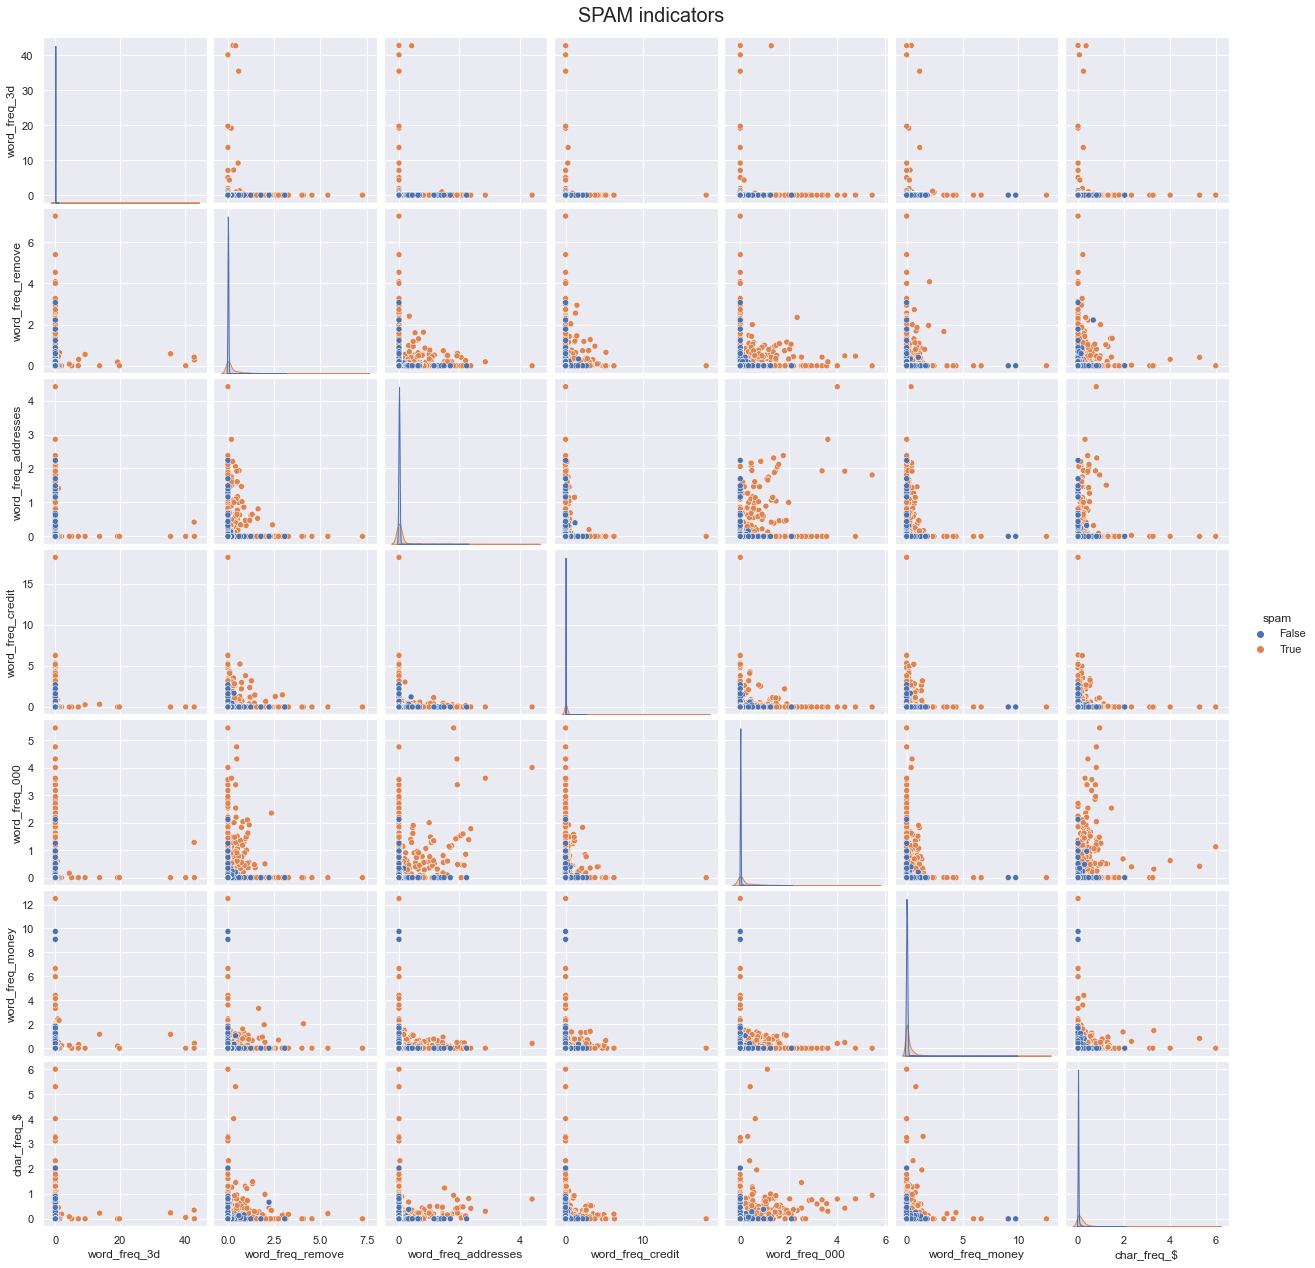

In [23]:
pair_spam = sns.pairplot(df2[index_spam], hue="spam")
pair_spam.fig.suptitle('SPAM indicators', y=1.01, fontsize=20)

We can see that we can't distinguish spam from non-spam if one word doesn't appear and the other rarely appears. On the other hand, in some pairs we can see, that if both words appear in an email, then it is likely that it's spam. Moreover if a word's frequency is high, then it's probably also a spam.<br>
Let's see how it looks in terms of non-spam emails.

In [24]:
index_non_spam = list(non_spam_diff_mean[non_spam_diff_mean.Ratio > 50].index.values)
index_non_spam.append("spam")
print(index_non_spam)

['word_freq_hp', 'word_freq_george', 'word_freq_lab', 'word_freq_telnet', 'word_freq_857', 'word_freq_cs', 'word_freq_meeting', 'spam']


Text(0.5, 1.01, 'NON_SPAM indicators')

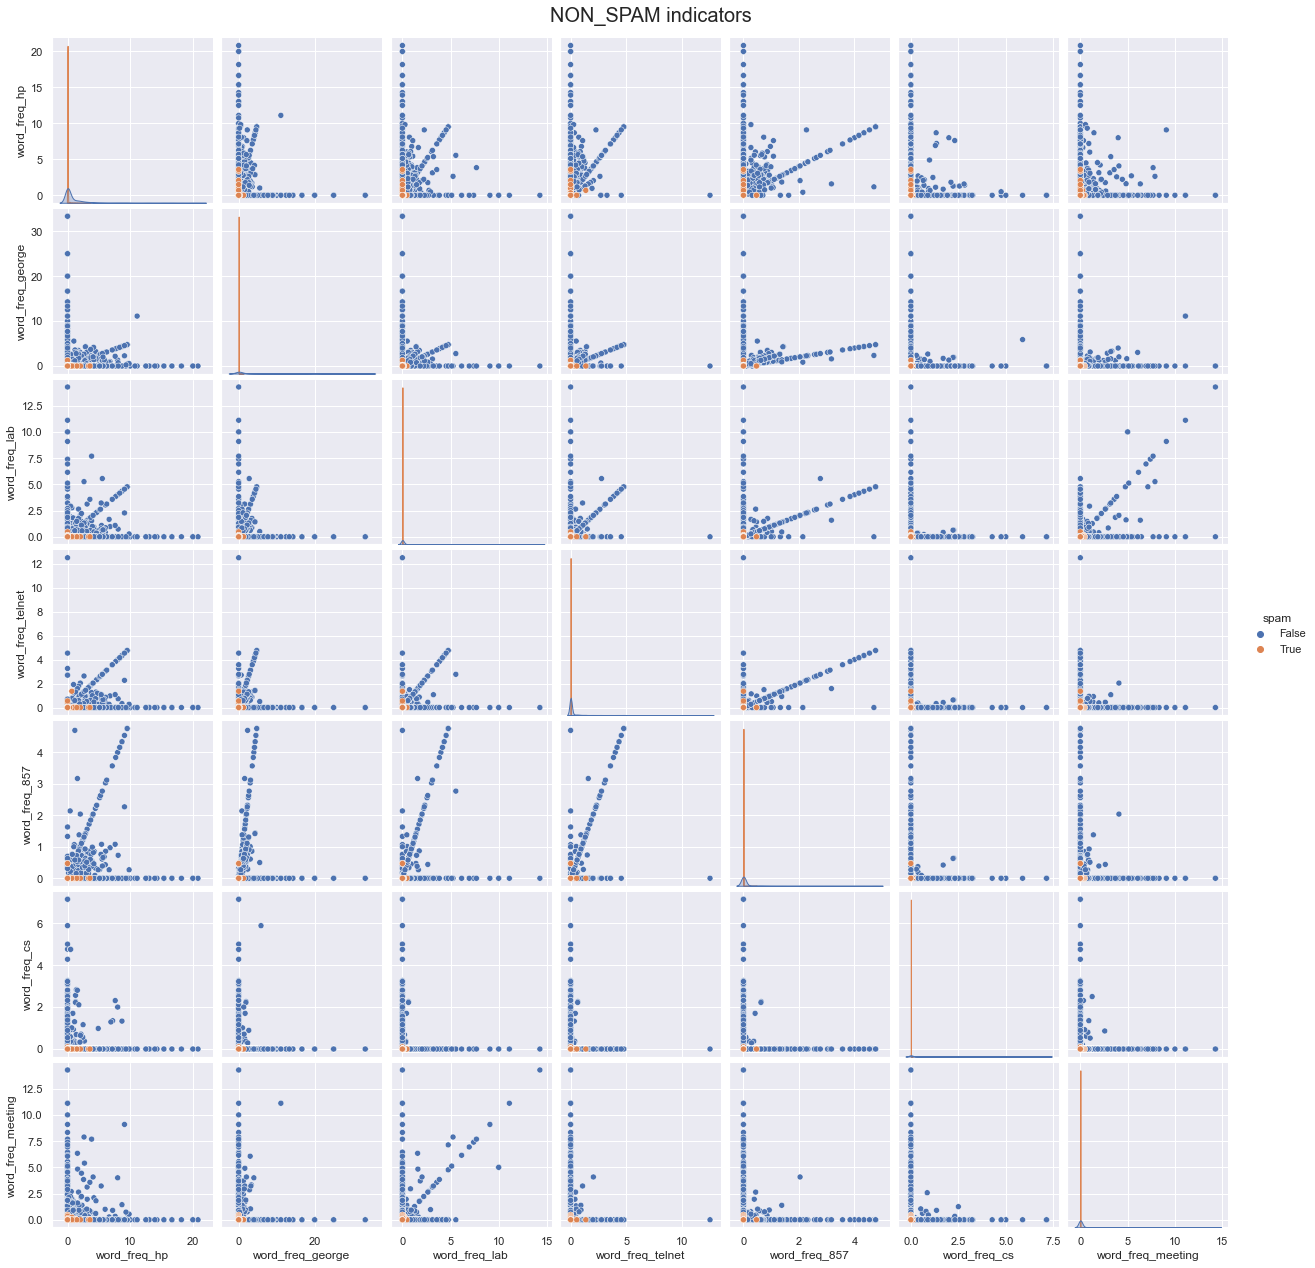

In [25]:
pair_non_spam = sns.pairplot(df2[index_non_spam].iloc[::-1], hue="spam")
pair_non_spam.fig.suptitle('NON_SPAM indicators', y=1.01, fontsize=20)

We can see that selected features strongly suggest that given email is not a spam. Except cases similar to spam emails, when the frequency of one word is low and the other word doesn't appear at all.<br>
What is very interesting, is that we can see correlation in some pairs. Indeed, if we take a look at selected features, they appeared also before in one of the extracted correlation matrices. So in non-spam emails these words very often appear simultaneously. Additionally, the words "cs" and "george" seem to indicate non-spam emails with high probability, because of calculated ratios.

## Only if appear and outliers
The next thing what we would like to mention is our data specificity. From provided table with basic characteristics, we can see that there are a lot of cases, when given word could not be found in an email. This leads to a big number of zero values in the data. In this part we will try to check the differences between features with zero values and without them. Additionally we will also look only at the outliers, which are the values that differs significantly from other observations. In our case we will take value that are bigger than $(Q3 + 1.5 * IQR)$, where Q3 is the upper quartile and IQR is the interquartile range.<br>
Let's start with comparing boxplots and histograms of one of the columns.

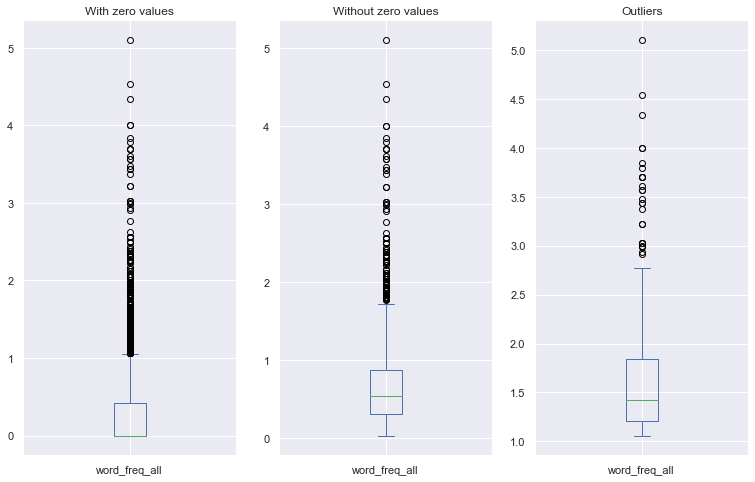

In [26]:
df_nospam = df2.loc[:, df2.columns!='spam']
Q1 = df_nospam.quantile(0.25)
Q3 = df_nospam.quantile(0.75)
IQR = Q3 - Q1
filtr1 = df_nospam > (Q3 + 1.5 * IQR)

plt.subplot(1,3,1)
df2["word_freq_all"].plot.box()
plt.title("With zero values")
plt.subplot(1,3,2)
df2[df2>0]["word_freq_all"].plot.box()
plt.title("Without zero values")
plt.subplot(1,3,3)
df_nospam[df_nospam>(Q3 + 1.5 * IQR)]["word_freq_all"].plot.box()
plt.title("Outliers")
plt.show()

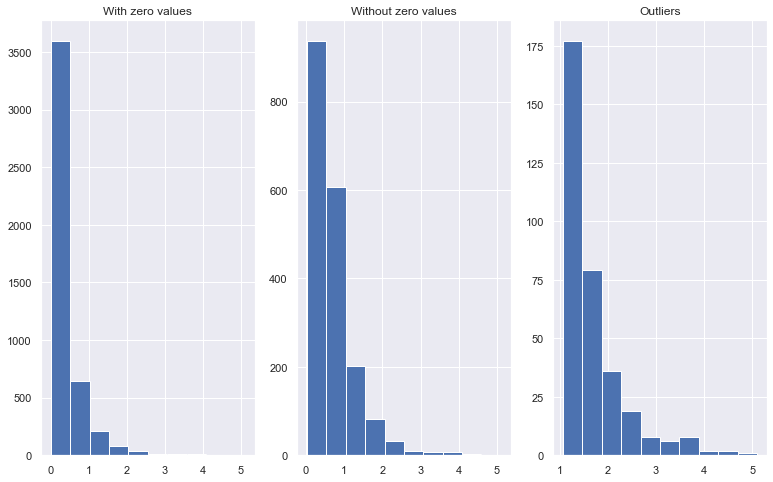

In [27]:
plt.subplot(1,3,1)
df2["word_freq_all"].hist()
plt.title("With zero values")
plt.subplot(1,3,2)
df2[df2>0]["word_freq_all"].hist()
plt.title("Without zero values")
plt.subplot(1,3,3)
df_nospam[df_nospam>(Q3 + 1.5 * IQR)]["word_freq_all"].hist()
plt.title("Outliers")
plt.show()

We can see, that in case of the data with zero values, there are a lot of data, which are considered as outliers. Moreover as we could see in the table with basic characteristics, all the quartiles are equal to 0 or very close to it. After removing the zero values, there are visible differences in the data distribution.
In case of outliers, we can see that the distribution also changed and is different from both previous cases.
Presentation of all of the features is available in additional directory (as amount of figures would make this raport unreadable)

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for column in df2:
        if column == "spam":
            continue
        plt.figure()
        plt.subplot(1,3,1)
        df2[column].plot.box()
        plt.title("With zero values")
        plt.subplot(1,3,2)
        df2[df2>0][column].plot.box()
        plt.title("Without zero values")
        plt.subplot(1,3,3)
        df_nospam[df_nospam>(Q3 + 1.5 * IQR)][column].plot.box()
        plt.title("Outliers")
    plt.close()

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for column in df2:
        if column == "spam":
            continue
        plt.figure()
        plt.subplot(1,3,1)
        df2[column].hist()
        plt.title("With zero values: " + column)
        plt.subplot(1,3,2)
        df2[df2>0][column].hist()
        plt.title("Without zero values: " + column)
        plt.subplot(1,3,3)
        df_nospam[df_nospam>(Q3 + 1.5 * IQR)][column].hist()
        plt.title("Outliers: " + column)
    plt.show()

We can see that in many cases the distribution of features changed.
Sometimes there is no difference between values greater then 0 and outliers, because the condition of being an outlier is simply that the value is greater than 0. On the other hand there are cases where we get three different sets of values.<br>
So now, if we decide to analyse only cases when a given word appears in an email, then our results may differ from previous. Let's for example take a look at the spam and non-spam indicators, when we don't consider zero values.

In [41]:
spam_diff_sum_n0 = pd.concat([spam[spam>0].sum(), non_spam[non_spam>0].sum(), spam[spam>0].sum()/non_spam[non_spam>0].sum()], axis=1)
spam_diff_sum_n0.columns = ["Spam", "Non-spam", "Ratio"]
spam_diff_sum_n0[spam_diff_sum_n0.Ratio > 8]

Spam  Non-spam       Ratio
word_freq_3d         298.550     2.470  120.870445
word_freq_remove     499.310    26.160   19.086774
word_freq_addresses  203.200    23.190    8.762398
word_freq_credit     372.610    21.130   17.634169
word_freq_000        447.910    19.760   22.667510
word_freq_money      385.950    47.780    8.077648
char_freq_$          316.329    32.476    9.740393

In [42]:
non_spam_diff_sum_n0 = pd.concat([spam[spam>0].sum(), non_spam[non_spam>0].sum(), non_spam[non_spam>0].sum()/spam[spam>0].sum()], axis=1)
non_spam_diff_sum_n0.columns = ["Spam", "Non-spam", "Ratio"]
non_spam_diff_sum_n0[non_spam_diff_sum_n0.Ratio > 50]

Spam  Non-spam        Ratio
word_freq_hp       31.69   2496.58    78.781319
word_freq_hpl      16.63   1204.40    72.423331
word_freq_george    2.81   3527.56  1255.359431
word_freq_lab       1.24    453.87   366.024194
word_freq_telnet    2.31    295.62   127.974026
word_freq_857       0.94    215.53   229.287234
word_freq_415       3.22    216.87    67.350932
word_freq_cs        0.10    200.81  2008.100000
word_freq_meeting   4.43    604.46   136.446953

The result above are the same are previous, because it is a sum and we eliminated zero values, which didn't impact the final result. Let's check how the situation looks in case of the mean values.

In [47]:
spam_diff_mean_n0 = pd.concat([spam[spam>0].mean(), non_spam[non_spam>0].mean(), spam[spam>0].mean()/non_spam[non_spam>0].mean()], axis=1)
spam_diff_mean_n0.columns = ["Spam", "Non-spam", "Ratio"]
spam_diff_mean_n0[spam_diff_mean_n0.Ratio > 3]

Spam   Non-spam      Ratio
word_freq_3d                  7.655128   0.308750  24.793938
capital_run_length_average    9.519165   2.377301   4.004190
capital_run_length_longest  104.393271  18.214491   5.731331

We can see that in this case we got less words that may indicate spam emails. Additionaly only the word "3d" appear in both situations, but now 2 different features seem to have bigger impact on final classification.

In [49]:
non_spam_diff_mean_n0 = pd.concat([spam[spam>0].mean(), non_spam[non_spam>0].mean(), non_spam[non_spam>0].mean()/spam[spam>0].mean()], axis=1)
non_spam_diff_mean_n0.columns = ["Spam", "Non-spam", "Ratio"]
non_spam_diff_mean_n0[non_spam_diff_mean_n0.Ratio > 8]

Spam  Non-spam      Ratio
word_freq_george   0.351250  4.569378  13.008906
word_freq_lab      0.103333  1.260750  12.200806
word_freq_cs       0.100000  1.366054  13.660544
word_freq_meeting  0.221500  1.883053   8.501368

When considering the non-spam ratio, we also have less features that stand out. However, this time the features are consistent with what we got previously. For this reason, we can assume that these words actually appear in non-spam emails.<br>
Let's do the same analysis for outliers.

In [6]:
spam_diff_sum_n0 = pd.concat([spam[spam>(Q3 + 1.5 * IQR)].sum(), non_spam[non_spam>(Q3 + 1.5 * IQR)].sum(), spam[spam>(Q3 + 1.5 * IQR)].sum()/non_spam[non_spam>(Q3 + 1.5 * IQR)].sum()], axis=1)
spam_diff_sum_n0.columns = ["Spam", "Non-spam", "Ratio"]
spam_diff_sum_n0[spam_diff_sum_n0.Ratio > 9]

Spam   Non-spam       Ratio
word_freq_3d                   298.550      2.470  120.870445
word_freq_remove               499.310     26.160   19.086774
word_freq_credit               372.610     21.130   17.634169
word_freq_000                  447.910     19.760   22.667510
char_freq_$                    289.314     22.081   13.102396
capital_run_length_average   12249.842    854.095   14.342482
capital_run_length_longest  142683.000  10517.000   13.566892

In [7]:
non_spam_diff_sum_n0 = pd.concat([spam[spam>(Q3 + 1.5 * IQR)].sum(), non_spam[non_spam>(Q3 + 1.5 * IQR)].sum(), non_spam[non_spam>(Q3 + 1.5 * IQR)].sum()/spam[spam>(Q3 + 1.5 * IQR)].sum()], axis=1)
non_spam_diff_sum_n0.columns = ["Spam", "Non-spam", "Ratio"]
non_spam_diff_sum_n0[non_spam_diff_sum_n0.Ratio > 50]

Spam  Non-spam        Ratio
word_freq_hp       31.69   2496.58    78.781319
word_freq_hpl      16.63   1204.40    72.423331
word_freq_george    2.81   3527.56  1255.359431
word_freq_lab       1.24    453.87   366.024194
word_freq_telnet    2.31    295.62   127.974026
word_freq_857       0.94    215.53   229.287234
word_freq_415       3.22    216.87    67.350932
word_freq_cs        0.10    200.81  2008.100000
word_freq_meeting   4.43    604.46   136.446953

This time the results above are different in case of sums, even that it is a sum, because we eliminated more than just zero values. It seems that the non-spam indicators are features for with an outliers is a value greater than 0, so the result didn't change.
Let's check how the situation looks in case of the mean values.

In [8]:
spam_diff_mean_n0 = pd.concat([spam[spam>(Q3 + 1.5 * IQR)].mean(), non_spam[non_spam>(Q3 + 1.5 * IQR)].mean(), spam[spam>(Q3 + 1.5 * IQR)].mean()/non_spam[non_spam>(Q3 + 1.5 * IQR)].mean()], axis=1)
spam_diff_mean_n0.columns = ["Spam", "Non-spam", "Ratio"]
spam_diff_mean_n0[spam_diff_mean_n0.Ratio > 2]

Spam   Non-spam      Ratio
word_freq_3d                 7.655128   0.308750  24.793938
word_freq_credit             0.988355   0.449574   2.198424
word_freq_000                0.744037   0.256623   2.899333
capital_run_length_average  38.765323  18.172234   2.133217

Again we got less words that may indicate spam emails. Moreover the word "3d" still seems to have the biggest impact on spam identifiacation.

In [9]:
non_spam_diff_mean_n0 = pd.concat([spam[spam>(Q3 + 1.5 * IQR)].mean(), non_spam[non_spam>(Q3 + 1.5 * IQR)].mean(), non_spam[non_spam>(Q3 + 1.5 * IQR)].mean()/spam[spam>(Q3 + 1.5 * IQR)].mean()], axis=1)
non_spam_diff_mean_n0.columns = ["Spam", "Non-spam", "Ratio"]
non_spam_diff_mean_n0[non_spam_diff_mean_n0.Ratio > 8]

Spam  Non-spam      Ratio
word_freq_george   0.351250  4.569378  13.008906
word_freq_lab      0.103333  1.260750  12.200806
word_freq_cs       0.100000  1.366054  13.660544
word_freq_meeting  0.221500  1.883053   8.501368

As we could assume the results for mean values are the same as we got after removing the zero values. It seems that these words actually occur mostly in non-spam emails.  

# Preparation of data for classification

Before we will actually start talking about classification methods, there is one problem that we should fix. If we will once more take a look at heatmap we've created earlier, we might notice that there are some variables are multicollinear. Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, and heatmap is one of them. However, it order to make it clear which variables exactly we should examine, we should look not only at individual correlations but at all of them. In order to be able to do that, we will use **Variance Inflation Factor(VIF)**.

In VIF method, we gonna pick each feature and regress it against all of the other features. For each individual regression, the factor is calculated as :

$$VIF = \frac{1}{1 - R^2},$$
where $R^2$ is the coefficient of determination in linear regression.

Therefore, as value of $R^2$ increases, so does VIF. Therefore, greater VIF denotes greater correlation between variables. When it comes to values, in general those above 10 very strongly indicate high multicollinearity.

Let's take a look at this parameter for our dataset:

In [5]:
vif = df[list(df.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])]
vif_info['Column'] = vif.columns
vif_info.sort_values('VIF', ascending=False)

VIF                      Column
31  135.309047               word_freq_857
33  131.987960               word_freq_415
39    4.061161            word_freq_direct
35    2.825180        word_freq_technology
30    2.713768            word_freq_telnet
29    2.454553              word_freq_labs
55    2.350605  capital_run_length_longest
27    2.121002               word_freq_650
18    2.090884               word_freq_you
28    1.955962               word_freq_lab
20    1.915388              word_freq_your
34    1.893452                word_freq_85
49    1.811126                 char_freq_(
56    1.737779    capital_run_length_total
24    1.723756                word_freq_hp
25    1.667981               word_freq_hpl
41    1.495225           word_freq_meeting
54    1.480457  capital_run_length_average
11    1.467488              word_freq_will
22    1.454618               word_freq_000
14    1.447490         word_freq_addresses
2     1.413556               word_freq_all
36    1.363955              word_freq_1999
52    1.348598                 char_freq_$
4     1.329527               word_freq_our
8     1.326399             word_freq_order
16    1.322860          word_freq_business
10    1.313454           word_freq_receive
21    1.304970              word_freq_font
17    1.297991             word_freq_email
48    1.272861                 char_freq_;
0     1.264152              word_freq_make
42    1.251423          word_freq_original
9     1.231711              word_freq_mail
5     1.218429              word_freq_over
6     1.207568            word_freq_remove
45    1.205586               word_freq_edu
51    1.193540                 char_freq_!
40    1.182124                word_freq_cs
12    1.180551            word_freq_people
7     1.163680          word_freq_internet
38    1.157735                word_freq_pm
44    1.156500                word_freq_re
23    1.155773             word_freq_money
15    1.150768              word_freq_free
19    1.116127            word_freq_credit
53    1.087113                 char_freq_#
13    1.084343            word_freq_report
37    1.066489             word_freq_parts
50    1.058555                 char_freq_[
32    1.048705              word_freq_data
43    1.030721           word_freq_project
26    1.024839            word_freq_george
47    1.019418        word_freq_conference
1     1.017979           word_freq_address
46    1.015939             word_freq_table
3     1.007463                word_freq_3d

As we can clearly see, there are two features for which value of VIF is significantly bigger than for others - those are "word_freq_857" and "word_freq_415". We can solve this problem in multiple ways: one would be to simply remove one or both problematic features because the same information is being captured by other variables. Also, it helps to reduce the redundancy in the dataset. Second way is to combine problematic variables (if possible). In our case, we can create one column that would contain information about frequency of appearing of words "857" and "415" and this is what we've decided to do. After combining those columns we gonna check values of VIF once more:

In [6]:
df['word_freq_857_or_415'] = abs(df['word_freq_857'] + df['word_freq_415'])
df = df.drop(['word_freq_857', 'word_freq_415'], axis=1)
column_to_move = df.pop("word_freq_857_or_415")
df.insert(54, "word_freq_857_or_415", column_to_move)

vif = df[list(df.columns[:-1])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])]
vif_info['Column'] = vif.columns
vif_info.sort_values('VIF', ascending=False)

VIF                      Column
54  5.322866        word_freq_857_or_415
37  4.053554            word_freq_direct
33  2.824157        word_freq_technology
30  2.713133            word_freq_telnet
29  2.454108              word_freq_labs
53  2.350268  capital_run_length_longest
27  2.120998               word_freq_650
18  2.090710               word_freq_you
28  1.955607               word_freq_lab
20  1.915126              word_freq_your
32  1.893410                word_freq_85
47  1.810981                 char_freq_(
55  1.737321    capital_run_length_total
24  1.723756                word_freq_hp
25  1.667976               word_freq_hpl
39  1.495168           word_freq_meeting
52  1.471094  capital_run_length_average
11  1.467476              word_freq_will
22  1.454190               word_freq_000
14  1.447414         word_freq_addresses
2   1.413519               word_freq_all
34  1.363295              word_freq_1999
50  1.346882                 char_freq_$
4   1.329494               word_freq_our
8   1.326240             word_freq_order
16  1.322788          word_freq_business
10  1.313450           word_freq_receive
21  1.304959              word_freq_font
17  1.297991             word_freq_email
46  1.272802                 char_freq_;
0   1.261494              word_freq_make
40  1.251276          word_freq_original
9   1.231681              word_freq_mail
5   1.218412              word_freq_over
6   1.207500            word_freq_remove
43  1.205560               word_freq_edu
49  1.192824                 char_freq_!
38  1.182124                word_freq_cs
12  1.180488            word_freq_people
7   1.163676          word_freq_internet
36  1.157710                word_freq_pm
42  1.156450                word_freq_re
23  1.155375             word_freq_money
15  1.150753              word_freq_free
19  1.115975            word_freq_credit
51  1.087089                 char_freq_#
13  1.084319            word_freq_report
35  1.066489             word_freq_parts
48  1.058547                 char_freq_[
31  1.048702              word_freq_data
41  1.030720           word_freq_project
26  1.024833            word_freq_george
45  1.019410        word_freq_conference
1   1.017828           word_freq_address
44  1.015939             word_freq_table
3   1.007462                word_freq_3d

Results that we've achieved are significantly better now - we came up with satisfying VIF values and we can proceed further to build classification models.

Firstly, we need to separate our dataset onto list of features (we denote it as X) and denote remaining column with spam classification as Y. After that, we split them into a training and test sets:

In [7]:
X = df.iloc[:, 0:56].values
y = df.iloc[:, 56].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

First two methods that we gonna consider are Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA). Both of them share one common assumption - data should follow normal distribution. From previous analysis, we can clearly see that our data does not meet said condition (We can also use function skew() that will show us that the skewness for all of our data is significantly bigger than it should be for normal distribution). Therefore, our goal would be to transform it such a way that it will be as similar to normal distribution as it is possible. There are multiple ways to achieve this, with one of the most known and accurate being power transformations, and in particular Box–Cox transformation. Unfortunately, as we saw in our previous analysis about our dataset, it contains a lot of "0" values, and therefore it makes Box-Cox transformation impossible to use. However, there is another power transformation that allows numeric values in our data to be equal 0 or be negative, and it is called **Yeo–Johnson transformation**:

\begin{equation}
y_i^{(\lambda)} = \begin{cases} ((y_i+1)^\lambda-1)/\lambda                      &  \text{if }\lambda \neq 0, y \geq 0 \\[4pt] 
                                \log(y_i + 1)                                    &  \text{if }\lambda =    0, y \geq 0 \\[4pt]
                                -((-y_i + 1)^{(2-\lambda)} - 1) / (2 - \lambda)  &  \text{if }\lambda \neq 2, y <    0 \\[4pt]
                                -\log(-y_i + 1)                                  &  \text{if }\lambda =    2, y <    0
                  \end{cases}      
\end{equation}

Let's use it on our data and perform previously mentioned methods:

In [8]:
k = 0
X_gaussian = X.copy()
for i in X_gaussian:
    X_gaussian[k] = list(yeojohnson(i)[0]) # Since method works only for 1-dimensional data, we need to use it in loop
    k += 1

In [9]:
X_gauss_train, X_gauss_test, y_gauss_train, y_gauss_test = train_test_split(X_gaussian, y, test_size=0.2, random_state=0)

Remaining methods that we will consider do not require a assumption about data being from normal distribution - therefore instead of using data obtained utilizing power transform, for following methods we will use standarized data, which should work better than normalization, as our data contains outliers.

Standardization is a scaling technique where features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively:

$$X^{*} = \frac{x - \mu}{\sigma},$$

where:

- $\mu$ - mean

- $\sigma$ - standard deviation from the mean

In [10]:
scale = StandardScaler() # Standarized data
scaled_data = scale.fit_transform(X)
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(scaled_data, y, test_size=0.2, random_state=0)

# Goal of classification task

For all of the methods that we will talk about, we gonna use GridSearchCV function which optimizes chosen parameters by cross-validated grid-search over a parameter grid in such a way that a chosen value is maximized. Metrics that we should consider choosing are:

- precision - quantifies the number of positive class predictions that actually belong to the positive class:

$$PREC = \frac{TP}{TP + FP}$$

- recall - quantifies the number of positive class predictions made out of all positive examples in the dataset:

$$REC = \frac{TP}{TP + FN}$$

- accuracy - it is the fraction of predictions our model got right. It is calculated using following formula:

$$ACC = \frac{TP + TN}{TP + TN + FP + FN},$$

- F1 (can be used as a replacement for accuracy) - it is the harmonic mean of precision and recall:

$$F1 = \frac{2\cdot PREC \cdot REC}{PREC+REC}$$

where:

- TP (True positive) - amount of cases in which model correctly classifies the positive class 

- TN (True negative) - amount of cases in which model correctly classifies the negative class 

- FP (False positive) - amount of cases in which model incorrectly predicts the positive class

- FN (False negative) - amount of cases in which model incorrectly predicts the negative class

Decision about which one of those metrics is the most important for us depends on our data and goal of our analysis. If we do not have specified goal other than performing as accurate classification as we can, we should choose either accuracy or F1 metric. We should use accuracy when the classes are balanced and there is no major downside to predicting false negatives and we should use F1 score when the classes are imbalanced and there is a serious downside to predicting false negatives. However, if we want to focus mainly on reducing amount of false positive or false negative cases even at the cost of overall accuracy being lower, then we should choose either precision or accuracy respectively.

If we look at our data, in our case FP is a case in which non-spam message is detected as spam, meanwhile FN is a case in which spam message is not detected as spam. While receiving spam message as a non-spam one is not desirable, in reality it is just annoying, and does not provide significant harm or consequences. Meanwhile, not receiving an important message because it was classified as a spam might lead to serious problems, as it might make someone not to read an important message. **Therefore goal of our analysis will be to find such a model with such parameters that precision will be maximized**.

# Classification

## Linear Discriminant Analysis

Linear Discriminant Analysis is a method that assigns the observation to the class for which the value of following function is the largest:

$$ \delta_{k} (x) = x \cdot \frac{\mu_{k}}{\sigma^2} - \frac{\mu_{k}^2}{2\sigma^2} + log(\pi_{k}),$$
	
where $\pi_{k}$ is a probability that an observation is from population k and $\sum\limits_{k} = 1$. Above function is called "discriminant function".

In Python, this method is implemented in LinearDiscriminantAnalysis function. It contains three possible solvers that we may choose, according to function's documentation:

- ‘svd’: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.

- ‘lsqr’: Least squares solution. Can be combined with shrinkage or custom covariance estimator.

- ‘eigen’: Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.

As mentioned previously, for this and all following methods we will use cross-validation grid search method to find such values of parameters that precision parameter would be the biggest.

In [89]:
lda = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
search = GridSearchCV(lda, grid, scoring='precision', cv=cv, n_jobs=-1)

In [90]:
results = search.fit(X_gaussian, y)
# summarize
print('Mean precision: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean precision: 0.940
Config: {'solver': 'svd'}


We've found a best solver to maximize precision, therefore we will use it for classification function.

In [91]:
lda = LinearDiscriminantAnalysis(solver='svd')
#Train the model using the training sets
lda.fit(X_gauss_train, y_gauss_train)

#Predict the response for test dataset
LDA_y_pred = lda.predict(X_gauss_test)

## Quadratic Discriminant Analysis

Linear Discriminant Analysis is a method that assigns the observation to the class for which the value of following function is the largest:

$$\delta_{k}(\bar{x}) = -\frac{1}{2}log|\Sigma_{k}| - \frac{1}{2}(\bar{x} - \bar{\mu_{k}})^T \Sigma_{k}^{-1}(\bar{x} - \bar{\mu_{k}}) + log(\pi_{k})$$

In Python, this method is implemented in QuadraticDiscriminantAnalysis function. It contains one parameter: reg_param - that, according to documentation, regularizes the per-class covariance estimates by transforming S2 as S2 = (1 - reg_param) * S2 + reg_param * np.eye(n_features), where S2 corresponds to the scaling_ attribute of a given class:

In [19]:
qda = QuadraticDiscriminantAnalysis(tol = 10**(-16))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['reg_param'] = list(np.arange(0.03, 0.18, 0.03))
search = GridSearchCV(qda, grid, scoring='precision', cv=cv, n_jobs=-1)

In [20]:
results = search.fit(X_gaussian, y)
# summarize
print('Mean precision: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean precision: 0.980
Config: {'reg_param': 0.15}


We've found a best solver to maximize precision, therefore we will use it for classification function.

In [21]:
qda = QuadraticDiscriminantAnalysis(reg_param = 0.15, tol = 10**(-16))
#Train the model using the training sets
qda.fit(X_gauss_train, y_gauss_train)

#Predict the response for test dataset
QDA_y_pred = qda.predict(X_gauss_test)

## Logistic Regression

Logistic regression is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables.

To implement it in Python, we will use LogisticRegression function, which, unlike previous functions, has multiple parameters we will want to optimize:

- solver

 - newton-cg - Newton's method
 
 - lbfgs (Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm) - Hessian matrix is approximated using updates specified by gradient evaluation
 
 - liblinear - uses a Coordinate Descent (CD) algorithm
 
 - sag (Stochastic Average Gradient) - optimizes the sum of a finite number of smooth convex functions
 
 - saga - variant of sag (often solver of choice for sparse multinomial logistic regression)
 
- C - inverse of regularization strength; must be a positive float

In [15]:
lr = LogisticRegression()
gridlr = dict()
gridlr['solver'] = ["liblinear", "newton-cg", "lbfgs", "sag", "saga"]
gridlr['C'] = [20, 10, 5, 1, 0.1, 0.01, 0.001]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(lr, gridlr, scoring='precision', cv=cv, n_jobs=-1)

In [16]:
results = search.fit(scaled_data, y)
# summarize
print('Mean precision: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean precision: 0.927
Config: {'C': 0.001, 'solver': 'saga'}


We've found a best solver to maximize precision, therefore we will use it for classification function.

In [263]:
lr = LogisticRegression(C = 0.001, solver='newton-cg')
#Train the model using the training sets
lr.fit(X_std_train, y_std_train)

#Predict the response for test dataset
LR_y_pred = lr.predict(X_std_test)

## K-Nearest Neighbors

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. A class label is assigned on the basis of a majority vote — the label that is most frequently represented around a given data point is used.

To implement it in Python, we will use KNeighborsClassifier function, which has following parameters to optimize:

- weights:

    - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally, 
 
    - ‘distance’ : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
 
- metric:

    - 'euclidean' - It is a measure of the true straight line distance between two points in Euclidean space.
 
    - 'manhattan' - The distance between two points is the sum of the absolute differences of their Cartesian coordinates.
 
    - 'minkowski' - distance =  $\Large(\sum\limits_{i = 1}^{n}|x_{i}-y_{i}|^p)^{\frac{1}{p}}$
 
- n_neighbors - amount of neighbors

In [18]:
knc = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
gridknc = dict()
gridknc['weights'] = ['uniform', 'distance']
gridknc['metric'] = ['euclidean', 'manhattan', 'minkowski']
gridknc['n_neighbors'] = list(range(1, 21, 2))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(knc, gridknc, scoring='precision', cv=cv, n_jobs=-1)
results = search.fit(scaled_data, y)
print('Mean precision: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean precision: 0.957
Config: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


We've found a best solver to maximize precision, therefore we will use it for classification function.

In [19]:
KNC = KNeighborsClassifier(n_neighbors = 19, metric = 'manhattan', weights = 'distance')

KNC.fit(X_std_train, y_std_train)

KNC_y_pred = KNC.predict(X_std_test)

## Support Vector Machine (SVM)

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points. SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In Python, this method is implemented in SVC function. Function's parameter that should be optimized are:

- kernel:

    - poly (polynomial kernel) - $\large K(\bar{x_{1}},\bar{x_{2}}) = (\bar{x_{1}} \cdot \bar{x_{2}} + c)^d$
	for $c \ge 0$
    
    - rbf (radial basis function) - $\large K(\bar{x_{1}}, \bar{x_{2}}) = exp(- \gamma||\bar{x_{1}} - \bar{x_{2}}||^2)$
	where $\gamma \in (0, 1)$
    
    - linear (linear kernel) - $\large K(\bar{x_{1}},\bar{x_{2}}) = \bar{x_{1}}^T \bar{x_{2}} + c$
    
- C - inverse of regularization strength; must be a positive float (if its value is higher, the optimization will
    choose smaller margin hyperplane, so training data miss classification rate will be lower)
    
- gamma - kernel coefficient for ‘rbf’, ‘poly’ - defines how far the influence of a single training example reaches. This means that high Gamma will consider only points close to the plausible hyperplane and low Gamma will consider points at greater distance.

In [368]:
svc = svm.SVC()
kernel = ['poly', 'rbf', 'linear']
C = [50, 10, 1, 0.1, 0.02]
gamma = ['scale', 1, 0.2, 0.02]
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision',error_score=0)
grid_result = grid_search.fit(scaled_data, y)
print('Mean precision: %.3f' % grid_result.best_score_)
print('Config: %s' % grid_result.best_params_)

Mean precision: 1.000
Config: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


We've found a best solver to maximize precision, therefore we will use it for classification function.

In [366]:
svc = svm.SVC(C = 0.1, gamma = 1, kernel = 'rbf')

svc.fit(X_std_train, y_std_train)

svc_y_pred = svc.predict(X_std_test)

Now that we've performed classification for all of our methods, we will compare them using classification accuracy assessment.

# Assessment of classification accuracy

For this part of our project, we gonna look at how did our methods perfomed for our dataset. For all of them we will perform comparison of precision values using the training and test set split. We will also calculate and visualize it using cross validation technique - precisely, we will use k-fold cross-validation:

K-fold cross-validation is a method that splits dataset into k portions. After that, it will use the first one as a validation(test) set in a classification model, and all remaining ones will be combined into training set. Once result is calculated, we perform classification but now the second portion is a test set and all others create a training set. We continue this process k times so that all portions of data worked as test set exactly once.

In [410]:
def cross_validation(model, X, y, k = 5):
    '''
    Performs Folds Cross-Validation
    
    Parameters:
    
    X(array) - Matrix of features
    
    y(array) - Target variable
    
    k(int, default value equal 3) - Number of folds for cross-validation.
    
    Returns:
    
    Dictionary containing the metrics of accuracy, precision, recall and F1 score for both training set and validation set.
    '''
    X2 = X.copy()
    random.shuffle(np.transpose(X2))
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                            X=X2,
                            y=y,
                            cv=k,
                            scoring=scoring,
                            return_train_score=True)
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean(),
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean(),
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [352]:
def cross_validation_visualisation(model, X, y, k = 3):
    '''
    Performs Folds Cross-Validation
    
    Parameters:
    
    X(array) - Matrix of features
    
    y(array) - Target variable
    
    k(int, default value equal 3) - Number of folds for cross-validation.
    
    Returns:
    
    Means of accuracy, precision, recall and F1 score for both training and validation sets.
    '''
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                            X=X,
                            y=y,
                            cv=cv,
                            scoring=scoring,
                            return_train_score=True)
    final_results = {"Mean Training Accuracy": results['train_accuracy'].mean(),
            "Mean Training Precision": results['train_precision'].mean(),
            "Mean Training Recall": results['train_recall'].mean(),
            "Mean Training F1 Score": results['train_f1'].mean(),
            "Mean Validation Accuracy": results['test_accuracy'].mean(),
            "Mean Validation Precision": results['test_precision'].mean(),
            "Mean Validation Recall": results['test_recall'].mean(),
            "Mean Validation F1 Score": results['test_f1'].mean()
            } 
    
    return "\n".join("{!r}: {!r},".format(k, v) for k, v in final_results.items())

In [300]:
def Visualisation(x_label, y_label, train_data, val_data, k = 3):
        '''
        Plots bar chart that shows training and validation results in each fold when applying K-fold cross validation.
        
        Parameters:
        
        x_label(str) - Name of algorithm used
         
        y_label(str) - Name of visualized metric 
        
        plot_title(str) - Name of plot title
         
        train_result:(list/array) - Contains either training precision, accuracy, or f1 score
        
        val_result:(list/array) - Contains either validation precision, accuracy, or f1 score
        
        k(int, default value equal 3) - Number of folds for cross-validation.
        
        Returns:

        Bar chart that shows training and validation results in each fold when applying K-fold cross validation
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold"]
        if k > 1:
            for i in range(2, k + 1):
                if i == 2:
                    labels.append("2nd Fold")
                elif i == 3:
                    labels.append("3rd Fold")
                else:
                    labels.append(str(i) + "th Fold")
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='royalblue', label='Training', edgecolor = 'black')
        plt.bar(X_axis+0.2, val_data, 0.4, color='gold', label='Validation', edgecolor = 'black')
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.title(str(y_label) + " scores with " + str(k) + " folds using " + str(x_label) + " method", fontsize = 25)
        plt.legend()
        plt.grid(True)
        plt.show()

## Linear Discriminant Analysis

Firstly, we will look at confusion matrices for predictions we've made earlier. For this particular form of results presentation we will also perform another classification that will focus on maximizing F1 score and compare results in order to be able to very quickly notice how much different results are.

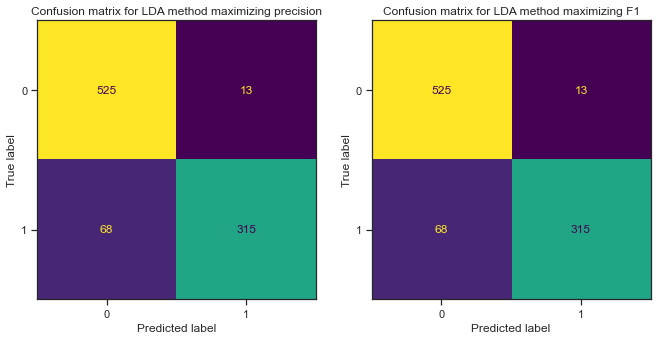

In [96]:
sns.set_theme(style="ticks")
rcParams['figure.figsize'] = 11, 8
LDAcm = confusion_matrix(y_gauss_test, LDA_y_pred)
LDAcmdisp = ConfusionMatrixDisplay(confusion_matrix = LDAcm) #display_labels=lda.classes_)
#fig1 = plt.figure()
axes1 = plt.subplot(1, 2, 1)
plt.title("Confusion matrix for LDA method maximizing precision", fontsize = 12)
LDAcmdisp.plot(ax = axes1, colorbar = False)

lda2 = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
search = GridSearchCV(lda2, grid, scoring='f1', cv=cv, n_jobs=-1)
results = search.fit(X_gaussian, y)
#print('Mean precision: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)
lda3 = LinearDiscriminantAnalysis(solver='svd')
#Train the model using the training sets
lda3.fit(X_gauss_train, y_gauss_train)

#Predict the response for test dataset
LDA_y_pred2 = lda3.predict(X_gauss_test)

LDAcm2 = confusion_matrix(y_gauss_test, LDA_y_pred2)
LDAcmdisp2 = ConfusionMatrixDisplay(confusion_matrix = LDAcm2) #display_labels=lda.classes_)
axes2 = plt.subplot(1, 2, 2)
plt.title("Confusion matrix for LDA method maximizing F1", fontsize = 12)
LDAcmdisp2.plot(ax = axes2, colorbar = False)

plt.show()

In [276]:
print("Maximized precision:",metrics.precision_score(y_gauss_test, LDA_y_pred))
print("Maximized f1 score:",metrics.f1_score(y_std_test, LDA_y_pred2))

Maximized precision: 0.9603658536585366
Maximized f1 score: 0.8860759493670886


For this particular method, suggested solver was exactly the same no matter whether we maximize precision or F1 score. As we can clearly see, our model did very good job at properly identifying non-spam messages - out of 538 cases, only 13 were recognized incorrectly. However, it did much worse job at properly filtering spam.

In [97]:
#fpr, tpr, thresholds = roc_curve(y_gauss_test, LDA_y_pred)
#roc_auc = metrics.auc(fpr, tpr)
#roc_auc
#plt.clf()
#plt.plot(fpr, tpr, 'r', label = "ROC curve (AUC=%0.2f)" % roc_auc)
#plt.plot([0,1], [0,1], 'k--')
#plt.title("ROC curve for LDA method")
#plt.xlabel("False positive rate")
#plt.ylabel("True positive rate")
#plt.legend()

Now we will use cross validation method to further check how did our model do: 

In [100]:
print(cross_validation_visualisation(lda, X_gaussian, y, 5))

'Mean Training Accuracy': 0.921860788058304,
'Mean Training Precision': 0.94273669331487,
'Mean Training Recall': 0.8535474221877593,
'Mean Training F1 Score': 0.8959254813224903,
'Mean Validation Accuracy': 0.9196552862397437,
'Mean Validation Precision': 0.9400065805999939,
'Mean Validation Recall': 0.8507224819379516,
'Mean Validation F1 Score': 0.8928968636240089,


Above metrics tell us about average values of accuracy, precision, recall and F1 score for our visualisation. Naturally, we are mostly interested in value of precision, which on average have a value of 0.94 for both training sets and validation set. For all other metrics values are also very similar for training and validation set, which means our classifier isnt overfitting or underfitting data. We can further prove it with following visualisation:

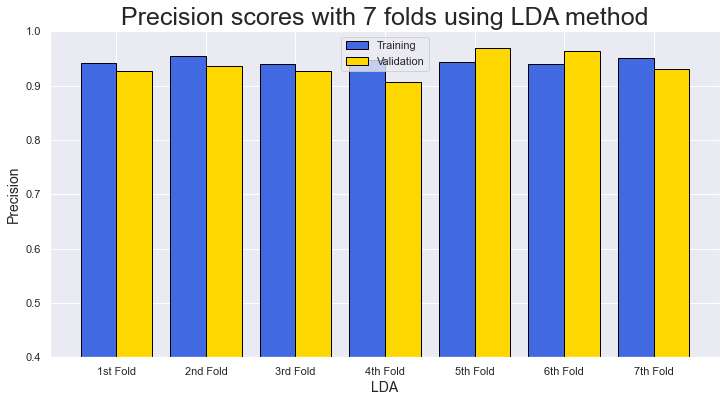

In [238]:
k = 7
LDA_cv = cross_validation(lda, X_gaussian, y, k)
Visualisation("LDA", "Precision", LDA_cv["Training Precision scores"],
              LDA_cv["Validation Precision scores"], k)

In above plot we see values of precision for training and validation sets for every single fold. Bars containing information about precision for training set are blue, and those for validation (test) set are gold.

As we can see, for every fold precision in training and validation sets are very similar to each other

## Quadratic Discriminant Analysis

Firstly we will compare confusion matrixes:

Mean f1: 0.783
Config: {'reg_param': 0.05}


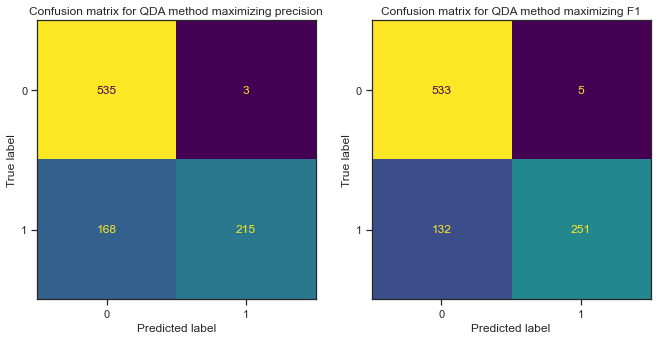

In [260]:
sns.set_theme(style="ticks")
rcParams['figure.figsize'] = 11, 8
QDAcm = confusion_matrix(y_gauss_test, QDA_y_pred)
QDAcmdisp = ConfusionMatrixDisplay(confusion_matrix = QDAcm)
axes1 = plt.subplot(1, 2, 1)
plt.title("Confusion matrix for QDA method maximizing precision", fontsize = 12)
QDAcmdisp.plot(ax = axes1, colorbar = False)

qda2 = QuadraticDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['reg_param'] = list(np.arange(0.05, 1, 0.1))
search = GridSearchCV(qda, grid, scoring='f1', cv=cv, n_jobs=-1)
results = search.fit(X_gaussian, y)
print('Mean f1: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
qda3 = QuadraticDiscriminantAnalysis(reg_param = 0.05, tol = 10**(-16))

qda3.fit(X_gauss_train, y_gauss_train)

QDA_y_pred2 = qda3.predict(X_gauss_test)

QDAcm2 = confusion_matrix(y_gauss_test, QDA_y_pred2)
QDAcmdisp2 = ConfusionMatrixDisplay(confusion_matrix = QDAcm2) #display_labels=lda.classes_)
axes2 = plt.subplot(1, 2, 2)
plt.title("Confusion matrix for QDA method maximizing F1", fontsize = 12)
QDAcmdisp2.plot(ax = axes2, colorbar = False)

plt.show()

In [274]:
print("Maximized precision:",metrics.precision_score(y_gauss_test, QDA_y_pred))
print("Maximized f1 score:",metrics.f1_score(y_std_test, QDA_y_pred2))

Maximized precision: 0.9862385321100917
Maximized f1 score: 0.7856025039123632


In this case, we clearly see a difference between confusion matrices (the most optimal parameters for maximizing f1 are returned just above matrices). When we maximized precision, we achieved slightly smaller amount of false positive cases (3 to 5), however recall is significantly smaller than if we were to focus on F1.

In [ ]:
'''fpr, tpr, thresholds = roc_curve(y_norm_test, QDA_y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_auc
plt.clf()
plt.plot(fpr, tpr, 'r', label = "ROC curve (AUC=%0.2f)" % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC curve for QDA method")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()'''

Now we will use cross validation method: 

In [111]:
print(cross_validation_visualisation(qda, X_gaussian, y, 5))

'Mean Training Accuracy': 0.828813366667172,
'Mean Training Precision': 0.9801962672044386,
'Mean Training Recall': 0.5772302393775822,
'Mean Training F1 Score': 0.7265744523019625,
'Mean Validation Accuracy': 0.8281558678361469,
'Mean Validation Precision': 0.9800283180364444,
'Mean Validation Recall': 0.5756926314937364,
'Mean Validation F1 Score': 0.7248126644604695,


QDA returns very good value of precision metric, which is what we wanted to focus on, however all other statistics are significantly smaller than in LDA case, especially recall. Again, values are very similar for both training and validation set. Now we will perform a visualisation:

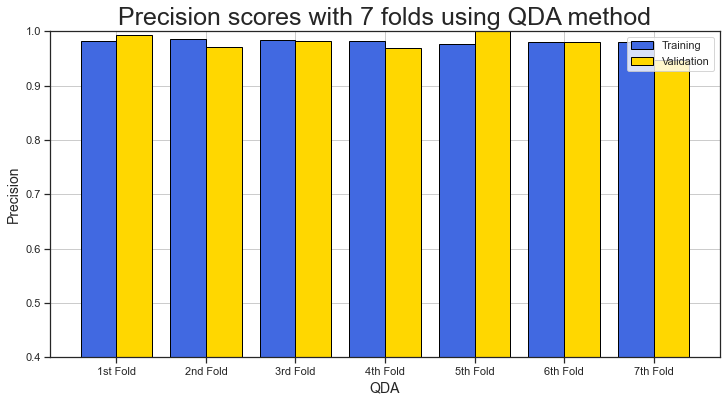

In [113]:
k = 7
QDA_cv = cross_validation(qda, X_gaussian, y, k)
Visualisation("QDA", "Precision", QDA_cv["Training Precision scores"],
              QDA_cv["Validation Precision scores"], k)

For every fold precision in training and validation sets are very similar to each other.

## Logistic regression

Let's take a look at confusion matrices:

Mean f1: 0.908
Config: {'C': 10, 'solver': 'newton-cg'}


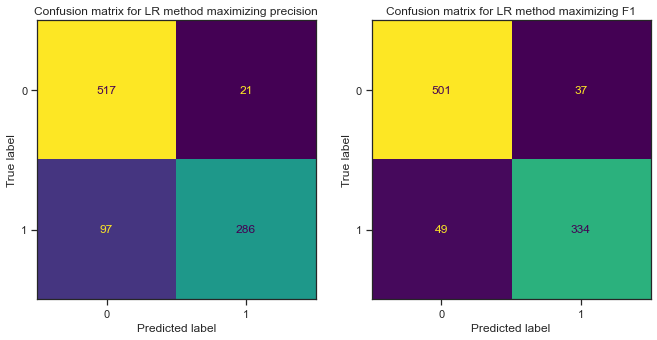

In [285]:
sns.set_theme(style="ticks")
rcParams['figure.figsize'] = 11, 8
LRcm = confusion_matrix(y_std_test, LR_y_pred)
axes1 = plt.subplot(1, 2, 1)
LRcmdisp = ConfusionMatrixDisplay(confusion_matrix = LRcm)
plt.title("Confusion matrix for LR method maximizing precision", fontsize = 12)
LRcmdisp.plot(ax = axes1, colorbar = False)

lr2 = LogisticRegression()
gridlr2 = dict()
gridlr2['solver'] = ["liblinear", "newton-cg", "lbfgs", "sag", "saga"]
gridlr2['C'] = [10, 5, 1, 0.1, 0.01, 0.001]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(lr2, gridlr2, scoring='f1', cv=cv, n_jobs=-1)
results = search.fit(scaled_data, y)
# summarize
print('Mean f1: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

lr3 = LogisticRegression(C = 10, solver = 'newton-cg')
lr3.fit(X_std_train, y_std_train)

lr_y_pred2 = lr3.predict(X_std_test)

lrcm2 = confusion_matrix(y_std_test, lr_y_pred2)
lrcmdisp2 = ConfusionMatrixDisplay(confusion_matrix = lrcm2) #display_labels=lda.classes_)
axes2 = plt.subplot(1, 2, 2)
plt.title("Confusion matrix for LR method maximizing F1", fontsize = 12)
lrcmdisp2.plot(ax = axes2, colorbar = False)

plt.show()

In [273]:
print("Maximized precision:",metrics.precision_score(y_std_test, LR_y_pred))
print("Maximized f1 score:",metrics.f1_score(y_std_test, lr_y_pred2))

Maximized precision: 0.9315960912052117
Maximized f1 score: 0.8859416445623342


Similarly to QDA case, there is a clear difference between both matrices - when we focus on maximizing F1, we almost double amount of False Positive cases (37 to 21), but we also cut it half amount of False Negative (49 to 97). Achieved precision is equal 0.93, which is lower than for both previous methods. Now we will check whether it actually holds true using cross validation:

In [277]:
print(cross_validation_visualisation(lr, scaled_data, y, 5))

'Mean Training Accuracy': 0.8805090701717753,
'Mean Training Precision': 0.9279357711518147,
'Mean Training Recall': 0.7554289866876649,
'Mean Training F1 Score': 0.8328392405613195,
'Mean Validation Accuracy': 0.879448426545946,
'Mean Validation Precision': 0.9273984433326397,
'Mean Validation Recall': 0.753472770323599,
'Mean Validation F1 Score': 0.8310011765644141,


Cross validation method confirms that, so far, logistic regression did worse than both previous methods when it comes to optimizing precision. Not only that, remaining metrics are also smaller than LDA case and slightly better than in QDA case. Let's also see visualisation:

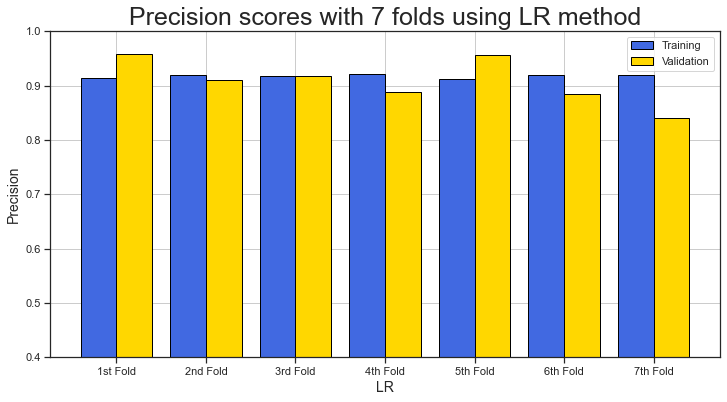

In [281]:
k = 7
lr_cv = cross_validation(lr, scaled_data, y, k)
Visualisation("LR", "Precision", lr_cv["Training Precision scores"],
              lr_cv["Validation Precision scores"], k)

Overall, results show that for our data logistic regression model in clearly inferior to linear discriminant analysis for all metrics. It may come to the fact that data for LDA was specially prepared (we've used Yeo–Johnson transformation  in order for data to be as close to normal distribution as possible), meanwhile for logistic regression we've just used a standarized data, without trying to change it in such a way classifier would benefit (like for example removing outliers). Logistic regression would most likely perform better in contrast to other methods if we didn't try to adjust our data in any way, since it is more general than method like LDA.

## K-Nearest neighbours

Let's once more analyze confusion matrices:

Mean f1: 0.907
Config: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


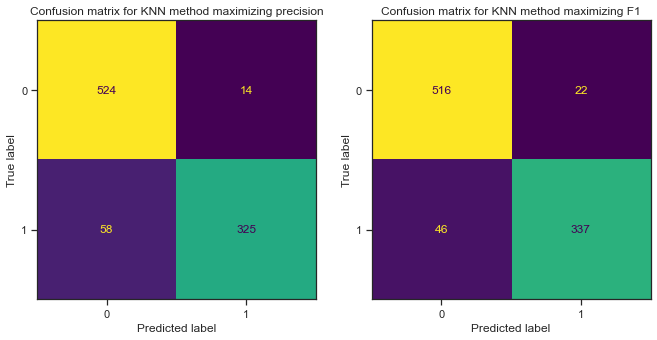

In [288]:
sns.set_theme(style="ticks")
rcParams['figure.figsize'] = 11, 8
KNCcm = confusion_matrix(y_std_test, KNC_y_pred)
axes1 = plt.subplot(1, 2, 1)
KNCcmdisp = ConfusionMatrixDisplay(confusion_matrix = KNCcm)
plt.title("Confusion matrix for KNN method maximizing precision", fontsize = 12)
KNCcmdisp.plot(ax = axes1, colorbar = False)

knc2 = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
gridknc2 = dict()
gridknc2['weights'] = ['uniform', 'distance']
gridknc2['metric'] = ['euclidean', 'manhattan', 'minkowski']
gridknc2['n_neighbors'] = list(range(1, 21, 2))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(knc2, gridknc2, scoring='f1', cv=cv, n_jobs=-1)
results = search.fit(scaled_data, y)
print('Mean f1: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

knc3 = KNeighborsClassifier(weights = 'distance', metric = 'manhattan', n_neighbors = 7)
knc3.fit(X_std_train, y_std_train)

KNC_y_pred2 = knc3.predict(X_std_test)

knccm2 = confusion_matrix(y_std_test, KNC_y_pred2)
knccmdisp2 = ConfusionMatrixDisplay(confusion_matrix = knccm2) #display_labels=lda.classes_)
axes2 = plt.subplot(1, 2, 2)
plt.title("Confusion matrix for KNN method maximizing F1", fontsize = 12)
knccmdisp2.plot(ax = axes2, colorbar = False)

plt.show()

In [351]:
print("Maximized precision:",metrics.precision_score(y_std_test, KNC_y_pred))
print("Maximized f1 score:",metrics.f1_score(y_std_test, KNC_y_pred2))

Maximized precision: 0.9387020648967551
Maximized f1 score: 0.9083557951482479


While confusion matrices definitely look different, differences between them are not as big as in, for example, logistic regression case. What is interesting is that combined number of false positive and false negative cases are very close in both matrices (72 to 68), despite the fact that F1 tries to maximize both precision and recall. It tells us that for KNN classifier we are allowed to search for parameters that maximize precision without significantly decreasing our recall, like it was in QDA and logistic regression cases. Maximized precision is almost equal 0.94, which is slightly below maximized value achieved by LDA method. Let us confirm it using cross validation:

In [353]:
print(cross_validation_visualisation(KNC, scaled_data, y, 7))

'Mean Training Accuracy': 0.9994123627633177,
'Mean Training Precision': 1.0,
'Mean Training Recall': 0.9985086738558085,
'Mean Training F1 Score': 0.9992537260133467,
'Mean Validation Accuracy': 0.9252364110786256,
'Mean Validation Precision': 0.9366339568709682,
'Mean Validation Recall': 0.8490802015663892,
'Mean Validation F1 Score': 0.8992714547513843,


Unlike previous methods, here we have a noticeable difference between values achieved during training and those calculated for test set. It is a indication that our model might be overfitted - which means it does very well during training, but it struggles to properly classify objects that are not similar enough to those from training data. In order to get an idea about what we should do, let's firstly visualize precision scores in k-fold cross validation scheme:

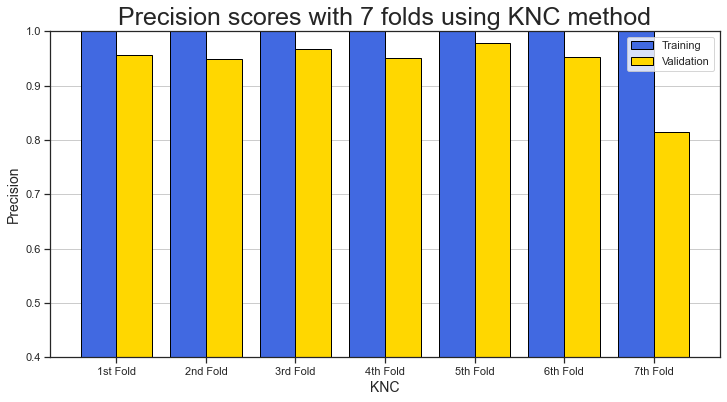

In [346]:
k = 7
KNC_cv = cross_validation(KNC, scaled_data, y, k)
Visualisation("KNC", "Precision", KNC_cv["Training Precision scores"],
              KNC_cv["Validation Precision scores"], k)

We should now ask ourselves whether we should change our model or accept it in this form. If we look at metrics achieved by the model's classification for test set, we can clearly see that despite model doing better on training data, it actually performs very well on validation set aswell. In case when mean of our main scoring metric would be lower (for example 0.8 or lower), than we would most likely need to make changes to our model. However, because model works very well on validation data, which is also confirmed by visualization (6 out of 7 folds were classified very well), we should accept it with its current parameters.

## Support vector machine

Mean f1: 0.917
Config: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


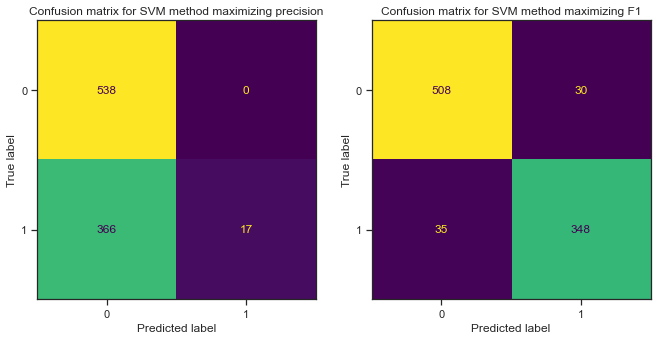

In [371]:
sns.set_theme(style="ticks")
rcParams['figure.figsize'] = 11, 8
SVCcm = confusion_matrix(y_std_test, svc_y_pred)
axes1 = plt.subplot(1, 2, 1)
SVCcmdisp = ConfusionMatrixDisplay(confusion_matrix = SVCcm)
plt.title("Confusion matrix for SVM method maximizing precision", fontsize = 12)
SVCcmdisp.plot(ax = axes1, colorbar = False)

svc2 = svm.SVC()
kernel = ['poly', 'rbf', 'linear']
C = [50, 10, 1, 0.1, 0.02]
gamma = ['scale', 1, 0.2]
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc2, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(scaled_data, y)
print('Mean f1: %.3f' % grid_result.best_score_)
print('Config: %s' % grid_result.best_params_)

svc3 = svm.SVC(C = 50, gamma = 'scale', kernel = 'rbf')
svc3.fit(X_std_train, y_std_train)
svc_y_pred2 = svc3.predict(X_std_test)
SVC3cm = confusion_matrix(y_std_test, svc_y_pred2)
axes2 = plt.subplot(1, 2, 2)
SVC3cmdisp = ConfusionMatrixDisplay(confusion_matrix = SVC3cm)
plt.title("Confusion matrix for SVM method maximizing F1", fontsize = 12)
SVC3cmdisp.plot(ax = axes2, colorbar = False)


In [372]:
print("Maximized precision:",metrics.precision_score(y_std_test, svc_y_pred))

print("Maximized F1 score:",metrics.f1_score(y_std_test, svc_y_pred2))

Maximized precision: 1.0
Maximized F1 score: 0.9145860709592641


In this case we clearly see that maximizing only precision severely affected our classifier - if we look at the fact that only 17 spam messages were classified properly and 366 were classified incorrectly, it actually makes it hard to call it classifier at all - it assignes 0 almost always, which despite the fact that precision is equal 1, makes it not usable. Meanwhile, it we look at confusion matrix for parameters that maximize F1 score, results there are much more reasonable - we do have 65 missclassifications as opposed to 366. What we can do it such situation would be to look at the model itself and at definitions of hyperparameters of support vector machine - earlier we've mentioned that gamma defines how far the influence of a single training example reaches. What is means is that the behavior of the model is very sensitive to the gamma parameter. For the other hyperparameter c, if its value is higher, the optimization will choose smaller margin hyperplane, so training data miss classification rate will be lower. It means that if want to avoid doing this mistake again, we should consider higher values of c hyperparameter, and lower values (but not too low) of gamma. Instead of looking at c from 0.02 to 50 and gamma from 0.02 to 1, we will try to consider c from 20 to 100 and gamma from 0.01 to 0.2. Let's see if it will change our results:

In [399]:
svc2 = svm.SVC()
kernel = ['poly', 'rbf']
C = [100, 50, 35, 20]
gamma = [0.2, 0.1, 0.01]
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc2, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision',error_score=0)
grid_result = grid_search.fit(scaled_data, y)
print('Mean precision: %.3f' % grid_result.best_score_)
print('Config: %s' % grid_result.best_params_)

Mean precision: 0.945
Config: {'C': 20, 'gamma': 0.01, 'kernel': 'poly'}


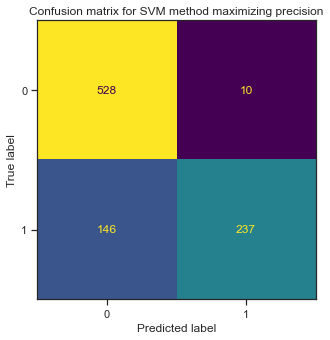

In [401]:
svc = svm.SVC(C = 20, gamma = 0.01, kernel = 'poly')
svc.fit(X_std_train, y_std_train)
svc_y_pred = svc.predict(X_std_test)
SVCcm = confusion_matrix(y_std_test, svc_y_pred)
axes2 = plt.subplot(1, 2, 2)
SVCdisp = ConfusionMatrixDisplay(confusion_matrix = SVCcm)
plt.title("Confusion matrix for SVM method maximizing precision", fontsize = 12)
SVCdisp.plot(ax = axes2, colorbar = False)

In [402]:
print("Maximized precision:",metrics.precision_score(y_std_test, svc_y_pred))

Maximized precision: 0.9595141700404858


After we have fixed our mistakes, result changed significantly - we kept very high precision, but this time recall is not as low as it was before - it is even bigger than for QDA method.

Let's further analyze our result using cross validation:

In [403]:
print(cross_validation_visualisation(svc, scaled_data, y, 5))

'Mean Training Accuracy': 0.8563275010781389,
'Mean Training Precision': 0.9890236088958054,
'Mean Training Recall': 0.6425199765170734,
'Mean Training F1 Score': 0.7789715016026337,
'Mean Validation Accuracy': 0.8317061209091766,
'Mean Validation Precision': 0.9254762414624689,
'Mean Validation Recall': 0.6082417582417582,
'Mean Validation F1 Score': 0.7396325078645846,


We can see that we've been successful in finding well-fitted parameters - differences between metrics for training and validation sets are noticeable, but similarly to KNN case, validation accuracy is high enough we shouldn't be worried about that. Let's also look at visualization:

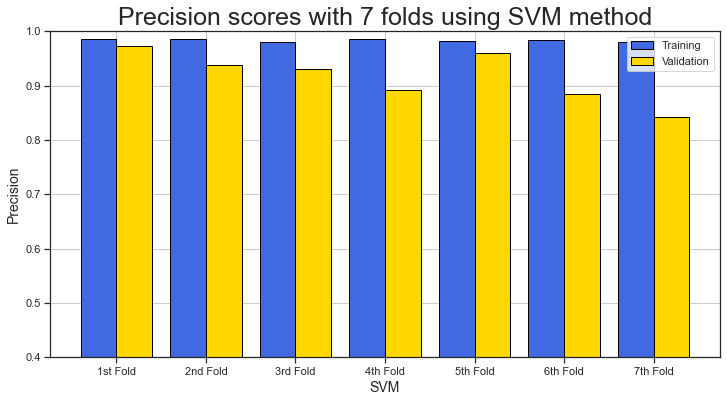

In [411]:
k = 7
svc_cv = cross_validation(svc, scaled_data, y, k)
Visualisation("SVM", "Precision", svc_cv["Training Precision scores"],
              svc_cv["Validation Precision scores"], k)

Similarly to linear regression, results that we ended up with are inferior to those from LDA method. As this method is much more versatile than LDA, since it does not have any assumptions about the data, it also has hyperparameters that might not be that easy to optimize (like we've shown with our first SVM classifier), as we have knowledge about these hyperparameters in order to properly balance between maximizing precision, but also not completely ignoring other statistics.

# Conclusions

To summarize, our goal was to create a classification rule that will maximize accuracy metric. Based on our analysis, we can say that Quadratic Discriminant Analysis gave us the best results and therefore should be used as a classification rule. However, if we are looking for high accuracy, but we would also prefer for other metrics, like recall or f1 score to not be as small as it is in case of QDA, LDA works as a very good alternative - while it offers slightly worse average accuracy (0.94 for LDA and 0.98 for QDA) it provides significantly bigger values of other metrics that we've discussed. All of this makes sense provided that we are able to prepare our data in a way we did it during our analysis - if we would not be able to do it, then we should consider using methods that do not require assumptions on data - KNN that with only a standarization provided results very similar to LDA, and SVM, which, while yielding results worse than previously mentioned methods for out dataset, is very flexible as a method as it does not require any assumptions onto a data, which makes it worth concidering aswell.

For further analysis, there are a lot of binary classifiers that we didn't mentioned here that could be used (decision trees, regularized discriminant analysis (RDA), penalized discriminant analysis (PDA) or neural networks. One could also prepare a comparison of how all of the methods perform on average for all data trasformations we've used (standarization, Yeo–Johnson) and additional ones (f.e. normalization) and on raw data and then take the average for all of those datasets - it would most likely completely change results that we've achieved, as it would most likely benefit flexible methods more.  